# Model K-means

This Jupyter notebook is used to:

1. Run PCA.
2. Run K-means.
3. Visualize results.

## 0. Load the data

In [1]:
import pandas as pd
import os

# Format scientific notation from Pandas
pd.set_option('display.float_format', lambda x: '%.5f' % x)

PREFIX_PATH = '/home/sramkova/diploma_thesis_data/cicids2017/attacks'
PREFIX_PATH = PREFIX_PATH + '/' + '/'.join(os.getcwd().split('/')[-2:]) + '/'
INPUT_CSV = PREFIX_PATH + 'final.csv'
print(INPUT_CSV)

data = pd.read_csv(INPUT_CSV, low_memory=False)
selected_df = data.copy()
selected_df.head(5)

/home/sramkova/diploma_thesis_data/cicids2017/attacks/2_thursday/web_attack_sql_injection/final.csv


originated_ip_num  responded_ip_num  connection.time  connection.duration  \
0            1.00000           0.75070          0.00892              0.00004   
1            1.00000           0.75070          0.91039              0.00004   
2            1.00000           0.67274          0.05100              0.16267   
3            1.00000           0.75070          0.11783              0.00003   
4            1.00000           0.19744          0.16311              0.00000   

   connection.orig_p  connection.orig_bytes  connection.orig_ip_bytes  \
0            0.76408                0.00872                   0.03473   
1            0.76551                0.00872                   0.03473   
2            0.76446                0.02193                   0.03683   
3            0.99241                0.00043                   0.00079   
4            0.76475                0.00000                   0.00059   

   connection.orig_pkts  connection.resp_p  connection.resp_bytes  ...  \
0               0.01568            0.00186                0.00018  ...   
1               0.01568            0.00186                0.00018  ...   
2               0.01387            0.00664                0.00700  ...   
3               0.00060            0.00050                0.00001  ...   
4               0.00030            0.00664                0.00000  ...   

   r_ip_bytes  connection.resp_pkts.1  protocol             service  \
0        4648                      28       tcp  gssapi,smb,dce_rpc   
1        4648                      28       tcp  gssapi,smb,dce_rpc   
2       62994                      50       tcp                 ssl   
3         150                       2       udp                 dns   
4           0                       0       tcp                none   

   conn_state       orig_p_cat       resp_p_cat  attacker_label  victim_label  \
0          SF  orig_reg_or_dyn  resp_well_known              No            No   
1          SF  orig_reg_or_dyn  resp_well_known              No            No   
2          SF  orig_reg_or_dyn         resp_443              No            No   
3          SF  orig_reg_or_dyn          resp_53              No            No   
4          SH  orig_reg_or_dyn         resp_443              No            No   

                     timestamp  
0  2017-07-06T13:35:16.061794Z  
1  2017-07-06T14:02:17.855831Z  
2  2017-07-06T13:36:31.772798Z  
3  2017-07-06T13:38:32.003958Z  
4  2017-07-06T13:39:53.447605Z  

[5 rows x 283 columns]

In [2]:
# shuffle 
selected_df = selected_df.sample(frac=1).reset_index(drop=True)
selected_df.head(5)

originated_ip_num  responded_ip_num  connection.time  connection.duration  \
0            1.00000           0.40202          0.22975              0.00007   
1            1.00000           0.75070          0.55719              0.00002   
2            1.00000           0.75070          0.62173              0.00000   
3            1.00000           0.77592          0.46684              0.15087   
4            1.00000           0.75070          0.88339              0.00194   

   connection.orig_p  connection.orig_bytes  connection.orig_ip_bytes  \
0            0.60517                0.00367                   0.00708   
1            0.93195                0.00032                   0.00049   
2            0.17799                0.00067                   0.00101   
3            0.76973                0.00732                   0.01289   
4            0.91781                0.00062                   0.00097   

   connection.orig_pkts  connection.resp_p  connection.resp_bytes  ...  \
0               0.00392            0.00664                0.00044  ...   
1               0.00030            0.00050                0.00005  ...   
2               0.00060            0.00050                0.00005  ...   
3               0.00663            0.00664                0.00055  ...   
4               0.00060            0.00050                0.00005  ...   

   r_ip_bytes  connection.resp_pkts.1  protocol  service  conn_state  \
0        4170                      10       tcp      ssl          SF   
1         425                       1       udp      dns          SF   
2         524                       2       udp      dns          SF   
3        5667                      22       tcp      ssl          SF   
4         516                       2       udp      dns          SF   

        orig_p_cat  resp_p_cat  attacker_label  victim_label  \
0  orig_reg_or_dyn    resp_443              No            No   
1  orig_reg_or_dyn     resp_53              No            No   
2  orig_reg_or_dyn     resp_53              No            No   
3  orig_reg_or_dyn    resp_443              No            No   
4  orig_reg_or_dyn     resp_53              No            No   

                     timestamp  
0   2017-07-06T13:41:53.33724Z  
1  2017-07-06T13:51:42.423069Z  
2  2017-07-06T13:53:38.533412Z  
3  2017-07-06T13:48:59.874197Z  
4  2017-07-06T14:01:29.272568Z  

[5 rows x 283 columns]

In [4]:
print('Dimension data: {} rows and {} columns'.format(len(selected_df), len(selected_df.columns)))

Dimension data: 17908 rows and 283 columns


In [5]:
# Numerical
pd.set_option('display.max_columns', None)
selected_df.describe()

originated_ip_num  responded_ip_num  connection.time  \
count        17908.00000       17908.00000      17908.00000   
mean             0.99810           0.64673          0.43430   
std              0.04353           0.20784          0.26208   
min              0.00000           0.00000          0.00000   
25%              1.00000           0.67274          0.21571   
50%              1.00000           0.75070          0.46742   
75%              1.00000           0.75070          0.63757   
max              1.00000           1.00000          1.00000   

       connection.duration  connection.orig_p  connection.orig_bytes  \
count          17908.00000        17908.00000            17908.00000   
mean               0.01376            0.78071                0.00372   
std                0.03954            0.24478                0.01515   
min                0.00000            0.00000                0.00000   
25%                0.00000            0.76934                0.00041   
50%                0.00003            0.85335                0.00056   
75%                0.00111            0.93358                0.00257   
max                1.00000            1.00000                1.00000   

       connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
count               17908.00000           17908.00000        17908.00000   
mean                    0.00603               0.00254            0.00312   
std                     0.02303               0.01472            0.03112   
min                     0.00000               0.00000            0.00000   
25%                     0.00076               0.00060            0.00050   
50%                     0.00093               0.00060            0.00050   
75%                     0.00486               0.00241            0.00093   
max                     1.00000               1.00000            1.00000   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
count            17908.00000               17908.00000           17908.00000   
mean                 0.00095                   0.00099               0.00250   
std                  0.01453                   0.01459               0.01809   
min                  0.00000                   0.00000               0.00000   
25%                  0.00001                   0.00002               0.00055   
50%                  0.00002                   0.00003               0.00055   
75%                  0.00009                   0.00013               0.00164   
max                  1.00000                   1.00000               1.00000   

        dns_count   ssh_count  http_count   ssl_count  files_count  \
count 17908.00000 17908.00000 17908.00000 17908.00000  17908.00000   
mean      0.66233     0.00352     0.07617     0.18679      0.01518   
std       0.47293     0.05921     0.26527     0.38975      0.04137   
min       0.00000     0.00000     0.00000     0.00000      0.00000   
25%       0.00000     0.00000     0.00000     0.00000      0.00000   
50%       1.00000     0.00000     0.00000     0.00000      0.00000   
75%       1.00000     0.00000     0.00000     0.00000      0.00000   
max       1.00000     1.00000     1.00000     1.00000      1.00000   

       orig_orig_total  orig_orig_connection.time_mean  \
count      17908.00000                     17908.00000   
mean           0.45726                         0.44333   
std            0.27119                         0.25739   
min            0.00000                         0.00000   
25%            0.21124                         0.21431   
50%            0.46337                         0.42813   
75%            0.64764                         0.63025   
max            1.00000                         1.00000   

       orig_orig_connection.duration_mean  \
count                         17908.00000   
mean                              0.20956   
std                               0.13779   
min                               0.00000   
25%  

In [6]:
# Columns names as constant lists for easier usage:

# columns that contain values of the current main connection
CONN_IDS_COLS = ['connection.uid', 'originated_ip', 'responded_ip']

CONN_NUMERICAL_COLS = ['connection.time', 
                       'connection.duration', 
                       # originator details
                       'connection.orig_p', 
                       'connection.orig_bytes', 
                       #'connection.orig_ip_bytes', 
                       'connection.orig_pkts', 
                       # responder details
                       'connection.resp_p', 
                       'connection.resp_bytes', 
                       #'connection.resp_ip_bytes', 
                       'connection.resp_pkts']

CONN_CATEGORICAL_COLS = ['connection.proto', 
                         'connection.service', 
                         'connection.conn_state']

CONN_APP_STATS = ['dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count']

# originator originated neighbrouhood columns:
ORIG_ORIG_NUMERICAL_COLS = ['orig_orig_total', 
                            'orig_orig_connection.time_mean', 
                            'orig_orig_connection.duration_mean',
                            #'orig_orig_connection.orig_p_mean', 
                            'orig_orig_connection.orig_pkts_mean',
                            'orig_orig_connection.orig_bytes_mean',
                            #'orig_orig_connection.resp_p_mean', 
                            'orig_orig_connection.resp_bytes_mean',
                            'orig_orig_connection.resp_pkts_mean']
                            
ORIG_ORIG_CATEGORICAL_COLS = ['orig_orig_connection.protocol_mode', 
                              'orig_orig_connection.service_mode', 
                              'orig_orig_connection.conn_state_mode']

ORIG_ORIG_PORTS_COLS = ['orig_orig_orig_p_well_known_count', 
                        'orig_orig_orig_p_reg_or_dyn_count', 
                        'orig_orig_resp_p_21_count', 
                        'orig_orig_resp_p_22_count',
                        'orig_orig_resp_p_53_count', 
                        'orig_orig_resp_p_80_count', 
                        'orig_orig_resp_p_123_count', 
                        'orig_orig_resp_p_443_count', 
                        'orig_orig_resp_p_3389_count',
                        'orig_orig_resp_p_well_known_count', 
                        'orig_orig_resp_p_reg_count', 
                        'orig_orig_resp_p_dyn_count']

ORIG_ORIG_APP_STATS_COLS = ['orig_orig_dns_count_mean', 
                            'orig_orig_ssh_count_mean', 
                            'orig_orig_http_count_mean', 
                            'orig_orig_ssl_count_mean', 
                            'orig_orig_files_count_mean']

ORIG_ORIG_SIMILAR_COLS = ['orig_orig_similar_conns_count',
                          'orig_orig_similar_dns_qtype_count', 
                          'orig_orig_similar_dns_rcode_count', 
                          'orig_orig_similar_ssh_auth_attempts_count', 
                          'orig_orig_similar_ssh_host_key_count', 
                          'orig_orig_similar_http_method_count',
                          'orig_orig_similar_http_status_code_count', 
                          'orig_orig_similar_http_user_agent_count',
                          'orig_orig_similar_ssl_version_count', 
                          'orig_orig_similar_ssl_cipher_count', 
                          'orig_orig_similar_ssl_curve_count',
                          'orig_orig_similar_ssl_validation_status_count', 
                          'orig_orig_similar_files_source_count', 
                          'orig_orig_similar_file_md5_count']

# originator responded neighbrouhood columns:
ORIG_RESP_NUMERICAL_COLS = ['orig_resp_total', 
                            'orig_resp_connection.time_mean', 
                            'orig_resp_connection.duration_mean',
                            #'orig_resp_connection.orig_p_mean', 
                            'orig_resp_connection.orig_pkts_mean',
                            'orig_resp_connection.orig_bytes_mean',
                            #'orig_resp_connection.resp_p_mean', 
                            'orig_resp_connection.resp_bytes_mean',
                            'orig_resp_connection.resp_pkts_mean']
                            
ORIG_RESP_CATEGORICAL_COLS = ['orig_resp_connection.protocol_mode', 
                              'orig_resp_connection.service_mode', 
                              'orig_resp_connection.conn_state_mode']

ORIG_RESP_PORTS_COLS = ['orig_resp_orig_p_well_known_count', 
                        'orig_resp_orig_p_reg_or_dyn_count', 
                        'orig_resp_resp_p_21_count', 
                        'orig_resp_resp_p_22_count',
                        'orig_resp_resp_p_53_count', 
                        'orig_resp_resp_p_80_count', 
                        'orig_resp_resp_p_123_count', 
                        'orig_resp_resp_p_443_count', 
                        'orig_resp_resp_p_3389_count',
                        'orig_resp_resp_p_well_known_count', 
                        'orig_resp_resp_p_reg_count', 
                        'orig_resp_resp_p_dyn_count']

ORIG_RESP_APP_STATS_COLS = ['orig_resp_dns_count_mean', 
                            'orig_resp_ssh_count_mean', 
                            'orig_resp_http_count_mean', 
                            'orig_resp_ssl_count_mean', 
                            'orig_resp_files_count_mean']

ORIG_RESP_SIMILAR_COLS = ['orig_resp_similar_conns_count',
                          'orig_resp_similar_dns_qtype_count', 
                          'orig_resp_similar_dns_rcode_count', 
                          'orig_resp_similar_ssh_auth_attempts_count', 
                          'orig_resp_similar_ssh_host_key_count', 
                          'orig_resp_similar_http_method_count',
                          'orig_resp_similar_http_status_code_count', 
                          'orig_resp_similar_http_user_agent_count',
                          'orig_resp_similar_ssl_version_count', 
                          'orig_resp_similar_ssl_cipher_count', 
                          'orig_resp_similar_ssl_curve_count',
                          'orig_resp_similar_ssl_validation_status_count', 
                          'orig_resp_similar_files_source_count', 
                          'orig_resp_similar_file_md5_count']

# responder originated neighbrouhood columns:
RESP_ORIG_NUMERICAL_COLS = ['resp_orig_total', 
                            'resp_orig_connection.time_mean', 
                            'resp_orig_connection.duration_mean',
                            #'resp_orig_connection.orig_p_mean', 
                            'resp_orig_connection.orig_pkts_mean',
                            'resp_orig_connection.orig_bytes_mean',
                            #'resp_orig_connection.resp_p_mean', 
                            'resp_orig_connection.resp_bytes_mean',
                            'resp_orig_connection.resp_pkts_mean']
                            
RESP_ORIG_CATEGORICAL_COLS = ['resp_orig_connection.protocol_mode', 
                              'resp_orig_connection.service_mode', 
                              'resp_orig_connection.conn_state_mode']

RESP_ORIG_PORTS_COLS = ['resp_orig_orig_p_well_known_count', 
                        'resp_orig_orig_p_reg_or_dyn_count', 
                        'resp_orig_resp_p_21_count', 
                        'resp_orig_resp_p_22_count',
                        'resp_orig_resp_p_53_count', 
                        'resp_orig_resp_p_80_count', 
                        'resp_orig_resp_p_123_count', 
                        'resp_orig_resp_p_443_count', 
                        'resp_orig_resp_p_3389_count',
                        'resp_orig_resp_p_well_known_count', 
                        'resp_orig_resp_p_reg_count', 
                        'resp_orig_resp_p_dyn_count']

RESP_ORIG_APP_STATS_COLS = ['resp_orig_dns_count_mean', 
                            'resp_orig_ssh_count_mean', 
                            'resp_orig_http_count_mean', 
                            'resp_orig_ssl_count_mean', 
                            'resp_orig_files_count_mean']

RESP_ORIG_SIMILAR_COLS = ['resp_orig_similar_conns_count',
                          'resp_orig_similar_dns_qtype_count', 
                          'resp_orig_similar_dns_rcode_count', 
                          'resp_orig_similar_ssh_auth_attempts_count', 
                          'resp_orig_similar_ssh_host_key_count', 
                          'resp_orig_similar_http_method_count',
                          'resp_orig_similar_http_status_code_count', 
                          'resp_orig_similar_http_user_agent_count',
                          'resp_orig_similar_ssl_version_count', 
                          'resp_orig_similar_ssl_cipher_count', 
                          'resp_orig_similar_ssl_curve_count',
                          'resp_orig_similar_ssl_validation_status_count', 
                          'resp_orig_similar_files_source_count', 
                          'resp_orig_similar_file_md5_count']

# responder responded neighbrouhood columns:
RESP_RESP_NUMERICAL_COLS = ['resp_resp_total', 
                            'resp_resp_connection.time_mean', 
                            'resp_resp_connection.duration_mean',
                            #'resp_resp_connection.orig_p_mean', 
                            'resp_resp_connection.orig_pkts_mean',
                            'resp_resp_connection.orig_bytes_mean',
                            #'resp_resp_connection.resp_p_mean', 
                            'resp_resp_connection.resp_bytes_mean',
                            'resp_resp_connection.resp_pkts_mean']
                            
RESP_RESP_CATEGORICAL_COLS = ['resp_resp_connection.protocol_mode', 
                              'resp_resp_connection.service_mode', 
                              'resp_resp_connection.conn_state_mode']

RESP_RESP_PORTS_COLS = ['resp_resp_orig_p_well_known_count', 
                        'resp_resp_orig_p_reg_or_dyn_count', 
                        'resp_resp_resp_p_21_count', 
                        'resp_resp_resp_p_22_count',
                        'resp_resp_resp_p_53_count', 
                        'resp_resp_resp_p_80_count', 
                        'resp_resp_resp_p_123_count', 
                        'resp_resp_resp_p_443_count', 
                        'resp_resp_resp_p_3389_count',
                        'resp_resp_resp_p_well_known_count', 
                        'resp_resp_resp_p_reg_count', 
                        'resp_resp_resp_p_dyn_count']

RESP_RESP_APP_STATS_COLS = ['resp_resp_dns_count_mean', 
                            'resp_resp_ssh_count_mean', 
                            'resp_resp_http_count_mean', 
                            'resp_resp_ssl_count_mean', 
                            'resp_resp_files_count_mean']

RESP_RESP_SIMILAR_COLS = ['resp_resp_similar_conns_count',
                          'resp_resp_similar_dns_qtype_count', 
                          'resp_resp_similar_dns_rcode_count', 
                          'resp_resp_similar_ssh_auth_attempts_count', 
                          'resp_resp_similar_ssh_host_key_count', 
                          'resp_resp_similar_http_method_count',
                          'resp_resp_similar_http_status_code_count', 
                          'resp_resp_similar_http_user_agent_count',
                          'resp_resp_similar_ssl_version_count', 
                          'resp_resp_similar_ssl_cipher_count', 
                          'resp_resp_similar_ssl_curve_count',
                          'resp_resp_similar_ssl_validation_status_count', 
                          'resp_resp_similar_files_source_count', 
                          'resp_resp_similar_file_md5_count']

# categorical
OHE_ORIG_P_CAT_COLS = ['orig_p_cat_orig_reg_or_dyn', 
                       'orig_p_cat_orig_well_known']

OHE_RESP_P_CAT_COLS = ['resp_p_cat_resp_123', 
                       'resp_p_cat_resp_21', 
                       'resp_p_cat_resp_22',
                       'resp_p_cat_resp_443', 
                       'resp_p_cat_resp_53',
                       'resp_p_cat_resp_80', 
                       'resp_p_cat_resp_dyn', 
                       'resp_p_cat_resp_reg',
                       'resp_p_cat_resp_well_known']

BACKUP_COLS = ['attacker_label', 'victim_label', 'connection.ts']

In [7]:
def load_col_names(list_name, file_path):
    f = open(file_path, 'r')
    for ohe_col in f:
        list_name.append(ohe_col.strip())
    f.close()
    # print(list_name)

In [ ]:
OHE_PROTO_CAT_COLS = []
OHE_SERVICE_CAT_COLS = []
OHE_CONN_STATE_CAT_COLS = []
ORIG_ORIG_OHE_CAT_COLS = []
ORIG_RESP_OHE_CAT_COLS = []
RESP_ORIG_OHE_CAT_COLS = []
RESP_RESP_OHE_CAT_COLS = []

load_col_names(OHE_PROTO_CAT_COLS,  PREFIX_PATH + 'ohe_proto_cat_cols.txt')
load_col_names(OHE_SERVICE_CAT_COLS,  PREFIX_PATH + 'ohe_service_cat_cols.txt')
load_col_names(OHE_CONN_STATE_CAT_COLS,  PREFIX_PATH + 'ohe_conn_state_cat_cols.txt')
load_col_names(ORIG_ORIG_OHE_CAT_COLS,  PREFIX_PATH + 'orig_orig_categorical_cols.txt')
load_col_names(ORIG_RESP_OHE_CAT_COLS,  PREFIX_PATH + 'orig_resp_categorical_cols.txt')
load_col_names(RESP_ORIG_OHE_CAT_COLS,  PREFIX_PATH + 'resp_orig_categorical_cols.txt')
load_col_names(RESP_RESP_OHE_CAT_COLS,  PREFIX_PATH + 'resp_resp_categorical_cols.txt')

In [9]:
df = selected_df.filter(CONN_NUMERICAL_COLS + 
                         CONN_APP_STATS + 
                         OHE_ORIG_P_CAT_COLS + 
                         OHE_RESP_P_CAT_COLS + 
                         OHE_PROTO_CAT_COLS + 
                         OHE_SERVICE_CAT_COLS + 
                         OHE_CONN_STATE_CAT_COLS + 
                         
                         # originator neighbourhood
                         ORIG_ORIG_NUMERICAL_COLS + 
                         ORIG_ORIG_PORTS_COLS + 
                         ORIG_ORIG_APP_STATS_COLS + 
                         ['orig_orig_similar_conns_count'] + 
                         # originator categorical neighbourhood 
                         ORIG_ORIG_OHE_CAT_COLS + 
                         
                         # originator neighbourhood 2 
                         ORIG_RESP_NUMERICAL_COLS + 
                         ORIG_RESP_PORTS_COLS + 
                         ORIG_RESP_APP_STATS_COLS + 
                         ['orig_resp_similar_conns_count'] + 
                         # originator categorical neighbourhood 2
                         ORIG_RESP_OHE_CAT_COLS + 
                         
                         # responder neighbourhood
                         RESP_ORIG_NUMERICAL_COLS + 
                         RESP_ORIG_PORTS_COLS + 
                         RESP_ORIG_APP_STATS_COLS + 
                         ['resp_orig_similar_conns_count'] + 
                         # responder categorical neighbourhood 
                         RESP_ORIG_OHE_CAT_COLS + 
                         
                         # responder neighbourhood 2
                         RESP_RESP_NUMERICAL_COLS + 
                         RESP_RESP_PORTS_COLS + 
                         RESP_RESP_APP_STATS_COLS + 
                         ['resp_resp_similar_conns_count'] + 
                         # responder categorical neighbourhood 2
                         RESP_RESP_OHE_CAT_COLS, axis=1)

In [10]:
df.head()

connection.time  connection.duration  connection.orig_p  \
0          0.22975              0.00007            0.60517   
1          0.55719              0.00002            0.93195   
2          0.62173              0.00000            0.17799   
3          0.46684              0.15087            0.76973   
4          0.88339              0.00194            0.91781   

   connection.orig_bytes  connection.orig_pkts  connection.resp_p  \
0                0.00367               0.00392            0.00664   
1                0.00032               0.00030            0.00050   
2                0.00067               0.00060            0.00050   
3                0.00732               0.00663            0.00664   
4                0.00062               0.00060            0.00050   

   connection.resp_bytes  connection.resp_pkts  dns_count  ssh_count  \
0                0.00044               0.00273    0.00000    0.00000   
1                0.00005               0.00027    1.00000    0.00000   
2                0.00005               0.00055    1.00000    0.00000   
3                0.00055               0.00601    0.00000    0.00000   
4                0.00005               0.00055    1.00000    0.00000   

   http_count  ssl_count  files_count  orig_p_cat_orig_reg_or_dyn  \
0     0.00000    1.00000      0.05556                           1   
1     0.00000    0.00000      0.00000                           1   
2     0.00000    0.00000      0.00000                           1   
3     0.00000    1.00000      0.05556                           1   
4     0.00000    0.00000      0.00000                           1   

   orig_p_cat_orig_well_known  resp_p_cat_resp_123  resp_p_cat_resp_21  \
0                           0                    0                   0   
1                           0                    0                   0   
2                           0                    0                   0   
3                           0                    0                   0   
4                           0                    0                   0   

   resp_p_cat_resp_22  resp_p_cat_resp_443  resp_p_cat_resp_53  \
0                   0                    1                   0   
1                   0                    0                   1   
2                   0                    0                   1   
3                   0                    1                   0   
4                   0                    0                   1   

   resp_p_cat_resp_80  resp_p_cat_resp_dyn  resp_p_cat_resp_reg  \
0                   0                    0                    0   
1                   0                    0                    0   
2                   0                    0                    0   
3                   0                    0                    0   
4                   0                    0                    0   

   resp_p_cat_resp_well_known  connection.proto_tcp  connection.proto_udp  \
0                           0                     1                     0   
1                           0                     0                     1   
2                           0                     0                     1   
3                           0                     1                     0   
4                           0                     0                     1   

   connection.service_dce_rpc  connection.service_dns  connection.service_ftp  \
0                           0                       0                       0   
1                           0                       1                       0   
2                           0                       1                       0   
3                           0                       0                       0   
4                           0                       1                       0   

   connection.service_ftp-data  connection.service_gssapi,ntlm,smb  \
0                            0                                   0   
1                            0  

In [11]:
df.columns

Index(['connection.time', 'connection.duration', 'connection.orig_p',
       'connection.orig_bytes', 'connection.orig_pkts', 'connection.resp_p',
       'connection.resp_bytes', 'connection.resp_pkts', 'dns_count',
       'ssh_count',
       ...
       'resp_resp_connection.service_mode_ssh',
       'resp_resp_connection.service_mode_ssl',
       'resp_resp_connection.conn_state_mode_OTH',
       'resp_resp_connection.conn_state_mode_REJ',
       'resp_resp_connection.conn_state_mode_RSTO',
       'resp_resp_connection.conn_state_mode_RSTR',
       'resp_resp_connection.conn_state_mode_S0',
       'resp_resp_connection.conn_state_mode_S1',
       'resp_resp_connection.conn_state_mode_SF',
       'resp_resp_connection.conn_state_mode_SH'],
      dtype='object', length=194)

## 1. Dimension Reduction (PCA)

In [12]:
from sklearn.decomposition import PCA

n_components = len(df.columns)
whiten = False
random_state = 2018
pca = PCA(n_components=n_components, whiten=whiten, random_state=random_state)

In [13]:
pca_X = pca.fit_transform(df)
pca_X = pd.DataFrame(data=pca_X)

print(f"Variance Explained by all {n_components} principal components: {sum(pca.explained_variance_ratio_)}")

Variance Explained by all 194 principal components: 1.0


In [14]:
importanceOfPrincipalComponents = pd.DataFrame(data=pca.explained_variance_ratio_)
importanceOfPrincipalComponents = importanceOfPrincipalComponents.T

n_components = [150, 10, 7, 5, 2]

for n in n_components:
    print('Variance Captured by First {:3} Principal Components: {}'.format(n, importanceOfPrincipalComponents.loc[:,0:n+1].sum(axis=1).values))
print('Variance Captured by the First Principal Component:  {}'.format(importanceOfPrincipalComponents.loc[:,0:1].sum(axis=1).values))

Variance Captured by First 150 Principal Components: [1.]
Variance Captured by First  10 Principal Components: [0.93150618]
Variance Captured by First   7 Principal Components: [0.90662513]
Variance Captured by First   5 Principal Components: [0.88301246]
Variance Captured by First   2 Principal Components: [0.8105143]
Variance Captured by the First Principal Component:  [0.7043766]


In [15]:
variance_ratios = pca.explained_variance_ratio_
df_cols = df.columns

for i in range(len(variance_ratios)):
    if round(variance_ratios[i], 8) > 0:
        print('Variance of {:42}: {:.8f}'.format(df_cols[i], variance_ratios[i]))

Variance of connection.time                           : 0.42796692
Variance of connection.duration                       : 0.27640968
Variance of connection.orig_p                         : 0.05992997
Variance of connection.orig_bytes                     : 0.04620773
Variance of connection.orig_pkts                      : 0.03366997
Variance of connection.resp_p                         : 0.02077387
Variance of connection.resp_bytes                     : 0.01805432
Variance of connection.resp_pkts                      : 0.01346818
Variance of dns_count                                 : 0.01014449
Variance of ssh_count                                 : 0.00907319
Variance of http_count                                : 0.00873167
Variance of ssl_count                                 : 0.00707619
Variance of files_count                               : 0.00601549
Variance of orig_p_cat_orig_reg_or_dyn                : 0.00537086
Variance of orig_p_cat_orig_well_known                : 0.0041

## 2. K-means

In [16]:
from datetime import datetime
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.k_means.html#sklearn.cluster.k_means
# https://towardsdatascience.com/k-means-clustering-with-scikit-learn-6b47a369a83c
from sklearn.cluster import KMeans

# Choose optimal K using Elbow method
score = []
inertia = []
print_info = []
computed_clusters = []
computed_clusters_fitted = []

print('Start at ' + datetime.now().strftime("%H:%M:%S") + '.')
for cluster in range(1, 25):
    try:
        km = KMeans(
            n_clusters=cluster, init='random',
            n_init=10, max_iter=300, 
            tol=1e-04, random_state=0
        )
        km_fitted = km.fit(pca_X)
        y_km = km.fit_predict(pca_X)
        computed_clusters.append(km)
        computed_clusters_fitted.append(km_fitted)
        score.append(km.score(pca_X))
        inertia.append(km.inertia_)
        print_str = 'Cluster initiation: {:2} ({})'.format(cluster, datetime.now().strftime("%H:%M:%S"))
        print_info.append(print_str)
        print(print_str)
    except:
        break
print('Done at ' + datetime.now().strftime("%H:%M:%S") + '.')

Start at 00:25:23.
Cluster initiation:  1 (00:25:24)
Cluster initiation:  2 (00:25:26)
Cluster initiation:  3 (00:25:28)
Cluster initiation:  4 (00:25:32)
Cluster initiation:  5 (00:25:35)
Cluster initiation:  6 (00:25:38)
Cluster initiation:  7 (00:25:42)
Cluster initiation:  8 (00:25:47)
Cluster initiation:  9 (00:25:51)
Cluster initiation: 10 (00:25:56)
Cluster initiation: 11 (00:26:00)
Cluster initiation: 12 (00:26:05)
Cluster initiation: 13 (00:26:09)
Cluster initiation: 14 (00:26:14)
Cluster initiation: 15 (00:26:18)
Cluster initiation: 16 (00:26:22)
Cluster initiation: 17 (00:26:27)
Cluster initiation: 18 (00:26:32)
Cluster initiation: 19 (00:26:36)
Cluster initiation: 20 (00:26:41)
Cluster initiation: 21 (00:26:47)
Cluster initiation: 22 (00:26:52)
Cluster initiation: 23 (00:26:57)
Cluster initiation: 24 (00:27:03)
Done at 00:27:03.


In [17]:
score

[-175207.36318977366,
 -104534.36441843487,
 -56145.844451069286,
 -46267.31466865205,
 -41389.03265716561,
 -37978.96567415197,
 -36107.01468996593,
 -34271.54158398076,
 -32534.706278986894,
 -30074.73040188747,
 -29208.92705378611,
 -28779.52654038269,
 -28059.73269298658,
 -26592.713860849268,
 -26051.92109436666,
 -24357.68849952305,
 -23916.74528883873,
 -23371.600408644746,
 -22567.56332574578,
 -22252.664691824557,
 -21856.71561181897,
 -21448.768567628118,
 -21074.025494337482,
 -20633.15822976138]

In [18]:
inertia

[175207.3631897737,
 104534.36441843487,
 56145.844451069286,
 46267.31466865205,
 41389.03265716561,
 37978.96567415197,
 36107.01468996593,
 34271.54158398076,
 32534.706278986894,
 30074.730401887467,
 29208.927053786105,
 28779.52654038269,
 28059.732692986574,
 26592.713860849268,
 26051.92109436666,
 24357.688499523054,
 23916.745288838727,
 23371.600408644746,
 22567.56332574578,
 22252.664691824557,
 21856.71561181897,
 21448.768567628118,
 21074.025494337482,
 20633.15822976138]

In [19]:
df_cost = pd.DataFrame({'Cluster': range(1, len(computed_clusters) + 1), 'Cost': inertia})

In [20]:
df_cost

Cluster         Cost
0         1 175207.36319
1         2 104534.36442
2         3  56145.84445
3         4  46267.31467
4         5  41389.03266
5         6  37978.96567
6         7  36107.01469
7         8  34271.54158
8         9  32534.70628
9        10  30074.73040
10       11  29208.92705
11       12  28779.52654
12       13  28059.73269
13       14  26592.71386
14       15  26051.92109
15       16  24357.68850
16       17  23916.74529
17       18  23371.60041
18       19  22567.56333
19       20  22252.66469
20       21  21856.71561
21       22  21448.76857
22       23  21074.02549
23       24  20633.15823

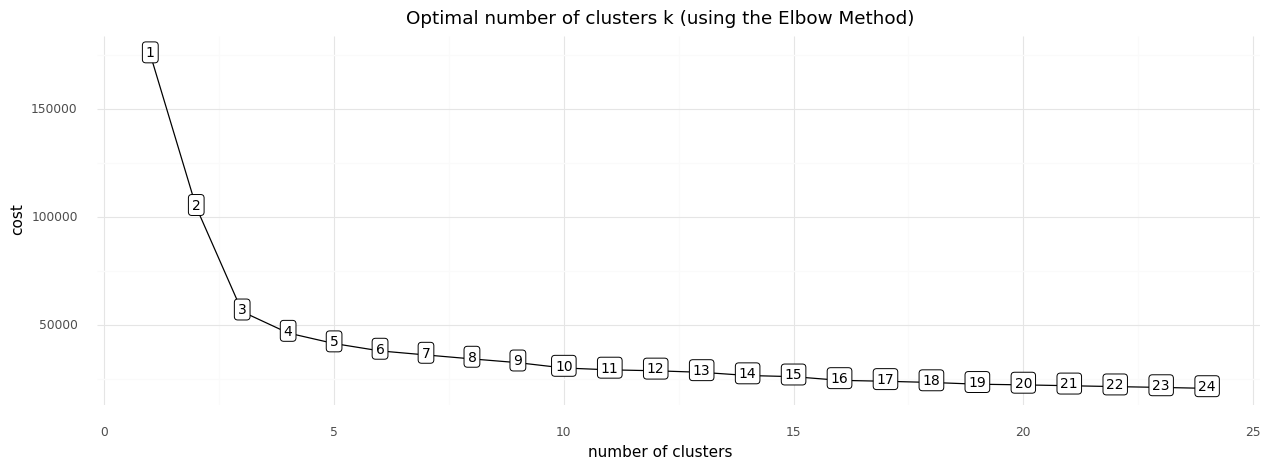

<ggplot: (8792187943921)>

In [21]:
# Import module for data visualization
from plotnine import *
import plotnine

plotnine.options.figure_size = (15, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of clusters k (using the Elbow Method)')+
    xlab('number of clusters')+
    ylab('cost')+
    theme_minimal()
)

In [73]:
# Fit the cluster
OPTIMAL_K = 4

kmeans = computed_clusters[OPTIMAL_K]

In [74]:
# Cluster centorid
kmeans.cluster_centers_

array([[ 2.25611261e+00, -1.07386084e+00,  1.75216362e+00,
         4.26239499e-01, -1.57104197e-01, -9.06626431e-02,
        -2.29240875e-01,  4.06461000e-02,  6.91145852e-02,
        -2.00349365e-03,  9.50910070e-03,  5.35993381e-02,
         6.20266408e-05,  2.90911176e-02, -1.10362011e-03,
        -1.16225799e-02,  1.15548314e-02, -1.86018866e-02,
         9.78903561e-03, -6.40987333e-03,  2.97480197e-02,
         2.32638521e-02, -4.37988695e-03,  2.67079513e-02,
         7.44527559e-03, -6.39788277e-03,  6.40420687e-04,
        -1.26630832e-02,  1.70256776e-02, -3.42466488e-02,
        -1.11928204e-03, -5.87920748e-03, -4.22275919e-03,
        -6.71762984e-04, -5.28748945e-04,  6.05799396e-03,
         1.63742808e-03,  1.34874702e-03, -3.75102091e-03,
        -6.28432765e-03, -1.86883501e-03,  8.46463901e-03,
        -4.07128778e-03,  7.51093718e-04,  1.98268755e-03,
        -1.77723349e-03,  3.50426447e-03, -8.53123237e-04,
         2.12209997e-03,  7.83277025e-04, -1.38156165e-0

In [75]:
# Check the iteration of the clusters created
kmeans.n_iter_

8

In [76]:
# Check the cost of the clusters created
kmeans.inertia_

41389.03265716561

In [77]:
# Add cluster labels to original dataframe
pca_X['cluster'] = kmeans.labels_
pca_X['cluster_cat'] = pca_X['cluster']

# (groupby works only on category type)
pca_X['cluster_cat'] = pca_X['cluster_cat'].astype('category')

In [78]:
pca_X.head()

0        1        2        3        4        5        6        7  \
0  2.78049 -1.49114 -0.88728 -0.41357  0.89239 -0.69691  0.02717  0.19792   
1  0.64168  2.93248 -0.07865  0.02436 -0.30149 -0.05695  0.03713 -0.04506   
2 -2.24655 -0.87491 -0.46173  0.78322  0.62070 -1.33698  0.06891  0.80895   
3  2.75210 -1.32673 -0.80162 -0.75295 -0.45726  0.16954  0.17999  0.06232   
4  0.67166  2.68660 -0.38263  0.82979 -0.54328 -0.05058 -0.08930 -0.18232   

         8        9       10       11       12       13       14       15  \
0 -0.07254 -0.36116  0.11907  0.10829 -0.04946 -0.16942 -0.56817 -0.11647   
1 -0.04082  0.01516  0.13063  0.00462 -0.05920 -0.01417 -0.01870 -0.04169   
2 -0.65440  0.03524  0.64785 -0.04909 -0.31368  0.21213  0.33410  0.20727   
3  0.29174 -0.24546 -0.00384 -0.00751 -0.05951 -0.01370  0.09880  0.07621   
4 -0.02627 -0.00260  0.19278 -0.03569 -0.06127 -0.20062  0.10117 -0.31802   

        16       17       18      19       20       21       22       23  \
0  0.02099  0.19132  0.03675 0.02337 -0.14949  0.08143  0.19878  0.14462   
1 -0.06805  0.03586  0.02281 0.03128  0.00974  0.09439  0.07735 -0.13635   
2  0.27643 -0.18011  0.28976 0.18482  0.25088 -0.17497 -0.07660  0.02608   
3 -0.00861 -0.00664 -0.01631 0.04054 -0.04865 -0.06516 -0.00260  0.03706   
4 -0.36703  0.22030  0.04156 0.02895 -0.04908 -0.16708 -0.01733  0.09424   

        24       25       26       27       28       29       30       31  \
0 -0.02659 -0.09057  0.11407  0.00052 -0.06890 -0.02285 -0.06668 -0.03708   
1  0.07547 -0.06749  0.02259 -0.15362  0.04675  0.04854 -0.03584  0.13246   
2  0.16081  0.15187 -0.08952 -0.12145  0.13519  0.05321 -0.09575  0.12864   
3 -0.00323 -0.03120  0.11405 -0.06203  0.05429  0.03170  0.03527 -0.00437   
4  0.13243 -0.14064  0.02087 -0.29132  0.08021  0.07857 -0.13345  0.32368   

        32       33       34       35       36       37       38       39  \
0 -0.00446  0.01492  0.02106 -0.02052 -0.00878 -0.00556  0.00170 -0.00317   
1 -0.11680 -0.00343 -0.02002 -0.06842  0.03055 -0.00421 -0.01774  0.02417   
2  0.14881  0.04683 -0.06521 -0.07767 -0.08435  0.03082 -0.00016 -0.03563   
3 -0.00701  0.00540 -0.00692 -0.01263 -0.06667  0.04287 -0.02186 -0.00905   
4 -0.17150 -0.00121  0.14387 -0.09221  0.08166  0.00277 -0.02281  0.02100   

        40      41       42       43       44       45       46       47  \
0 -0.01202 0.00311  0.00732 -0.00006  0.07467  0.02677 -0.00072 -0.03286   
1 -0.02519 0.00810 -0.03248  0.02963 -0.01597  0.05677 -0.01176 -0.01674   
2  0.00764 0.04476  0.04578  0.01783 -0.02952  0.00366  0.01910  0.00521   
3 -0.03634 0.02645  0.01845  0.03229  0.05122  0.04838 -0.02538 -0.03675   
4  0.01959 0.00505 -0.06447 -0.02977  0.03800 -0.00985 -0.02203  0.00031   

        48       49       50       51       52       53       54       55  \
0 -0.04849 -0.05768 -0.01851 -0.02784 -0.01396  0.00794  0.00104 -0.00302   
1  0.04131 -0.01566  0.04504 -0.00469  0.07748 -0.02744 -0.03742 -0.03290   
2  0.00199  0.04088 -0.02726 -0.00674 -0.01437  0.03924  0.00188  0.01816   
3 -0.05437 -0.05109 -0.03959 -0.01391 -0.01104  0.01259  0.01210 -0.01305   
4  0.09806 -0.01363 -0.00020  0.01107 -0.11037  0.11307  0.10207  0.00363   

        56       57       58       59       60       61       62       63  \
0  0.00115  0.01466 -0.00443 -0.01450  0.00122 -0.02124  0.00202  0.01650   
1 -0.00319 -0.04181  0.02871  0.01382 -0.04444 -0.02644  0.00313  0.01881   
2 -0.02846  0.02791  0.00408 -0.01918  0.01950 -0.01677 -0.00515  0.01734   
3 -0.00068 -0.02014  0.02909  0.10631  0.06973 -0.02289  0.00869  0.00845   
4 -0.01137  0.03074 -0.00255 -0.01220  0.02931  0.02899 -0.03667 -0.05064   

        64       65       66       67      68       69       70       71  \
0 -0.01394 -0.00595 -0.00525 -0.00176 0.01872  0.00067  0.00161 -0.02142   
1 -0.01272  0.00556 -0.00415  0.01057 0.00702 -0.00699  0.00095 -0.00361   
2 -0.01443  0.00836  0.00491  0.01853 0.00713 -0.00568  0.01925 -0.01377   
3 -0.02544 -0

In [79]:
pca_X.columns

Index([            0,             1,             2,             3,
                   4,             5,             6,             7,
                   8,             9,
       ...
                 186,           187,           188,           189,
                 190,           191,           192,           193,
           'cluster', 'cluster_cat'],
      dtype='object', length=196)

In [80]:
pca_X['cluster'].value_counts()

3    8247
2    3746
1    3511
0    1953
4     451
Name: cluster, dtype: int64

## 3. Results

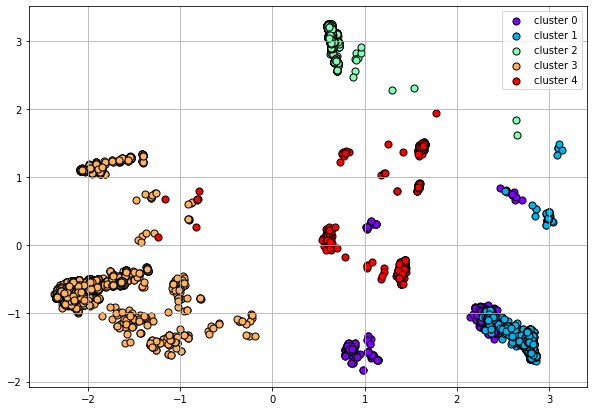

In [81]:
import matplotlib.pyplot as plt
import matplotlib.cm as mcm
import numpy as np

pca_X_array = np.array(pca_X)

plt.rcParams["figure.figsize"] = (10,7)
colors = mcm.rainbow(np.linspace(0, 1, OPTIMAL_K + 1))

# plot the clusters
for i in range(OPTIMAL_K + 1):   
    plt.scatter(
        pca_X_array[kmeans.labels_ == i, 0], pca_X_array[kmeans.labels_ == i, 1],
        s=50, c=[colors[i]], # warning if not array
        marker='o', edgecolor='black',
        label='cluster ' + str(i)
    )

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [82]:
# https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

from mpl_toolkits import mplot3d

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def subplot_3d_viz(fig, azim, elev, col_i):
    ax = fig.add_subplot(1, 3, col_i, projection='3d')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    ax.azim = azim  # default -60
    ax.elev = elev  # default 30

    for i in pca_X['cluster'].unique(): 
        ax.scatter(pca_X_array[kmeans.labels_ == i, 0], 
                   pca_X_array[kmeans.labels_ == i, 1], 
                   pca_X_array[kmeans.labels_ == i, 2], 
                   c=[colors[i]],
                   edgecolor='black',
                   label='cluster ' + str(i));

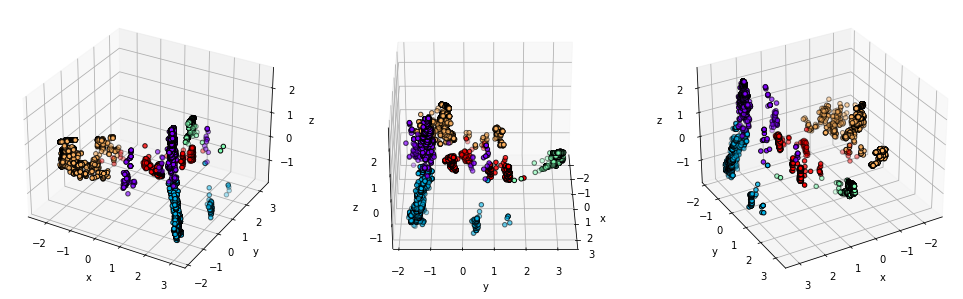

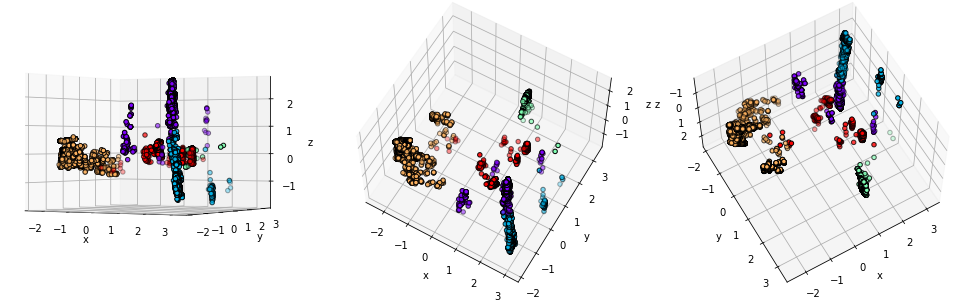

In [83]:
azims = [-60, 0, 60]
elevs = [0, 60, 240]

fig = plt.figure(figsize=(17,19))
fig.tight_layout()

for i in range(len(azims)):
    subplot_3d_viz(fig, azims[i], 30, i+1)

plt.show()

fig = plt.figure(figsize=(17,19))
fig.tight_layout()

for i in range(len(elevs)):
    subplot_3d_viz(fig, -60, elevs[i], i+1)

plt.show()

In [84]:
INTERPRETATION_COLS = ['uid', 
                       'originated_ip_num', 'originated_ip', 
                       'responded_ip_num', 'responded_ip', 
                       'timestamp', 'connection.time', 
                       'duration', 'connection.duration',
                       'protocol', 'service', 'conn_state',
                       'connection.orig_p', 'o_port', 'orig_p_cat', 'connection.orig_bytes', 'o_bytes', 'connection.orig_pkts', 'connection.orig_pkts.1', #'o_ip_bytes', 
                       'connection.resp_p', 'r_port', 'resp_p_cat', 'connection.resp_bytes', 'r_bytes', 'connection.resp_pkts', 'connection.resp_pkts.1', #'r_ip_bytes',
                       'dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count', 
                       'attacker_label', 'victim_label']

In [85]:
# Cluster interpretation

# join dfs
labels_df = selected_df[INTERPRETATION_COLS]

result = pd.concat([pca_X, labels_df], axis=1)
result

0        1        2        3        4        5        6        7  \
0      2.78049 -1.49114 -0.88728 -0.41357  0.89239 -0.69691  0.02717  0.19792   
1      0.64168  2.93248 -0.07865  0.02436 -0.30149 -0.05695  0.03713 -0.04506   
2     -2.24655 -0.87491 -0.46173  0.78322  0.62070 -1.33698  0.06891  0.80895   
3      2.75210 -1.32673 -0.80162 -0.75295 -0.45726  0.16954  0.17999  0.06232   
4      0.67166  2.68660 -0.38263  0.82979 -0.54328 -0.05058 -0.08930 -0.18232   
...        ...      ...      ...      ...      ...      ...      ...      ...   
17903 -1.98526 -0.65113 -0.34304  0.60612 -0.71241 -0.24878  0.14519 -0.12381   
17904  0.63929  2.96686  0.14178 -0.39709  0.57264 -0.16173 -0.01699 -0.07033   
17905 -1.96412 -0.64496 -0.34660  0.98319 -0.09582  0.21601 -0.25603 -0.58202   
17906 -2.25675 -0.70593 -0.17056 -0.08123 -0.85132 -0.01750  0.24096  0.64650   
17907  0.61474  3.04738  0.12967 -0.47272  0.17618 -0.10960  0.05298  0.02089   

             8        9       10       11       12       13       14       15  \
0     -0.07254 -0.36116  0.11907  0.10829 -0.04946 -0.16942 -0.56817 -0.11647   
1     -0.04082  0.01516  0.13063  0.00462 -0.05920 -0.01417 -0.01870 -0.04169   
2     -0.65440  0.03524  0.64785 -0.04909 -0.31368  0.21213  0.33410  0.20727   
3      0.29174 -0.24546 -0.00384 -0.00751 -0.05951 -0.01370  0.09880  0.07621   
4     -0.02627 -0.00260  0.19278 -0.03569 -0.06127 -0.20062  0.10117 -0.31802   
...        ...      ...      ...      ...      ...      ...      ...      ...   
17903  0.27734 -0.10184 -0.05735 -0.04242  0.18125 -0.23486  0.14551 -0.14034   
17904  0.07820 -0.05949 -0.37719  0.00390  0.25583 -0.07738  0.14561 -0.09150   
17905 -0.36960  0.13320  0.29037  0.11435  0.18816 -0.17919 -0.19233  0.17757   
17906  0.25058 -0.05534 -0.11578 -0.10774  0.05020 -0.21833 -0.04916  0.12248   
17907 -0.00143 -0.01004 -0.13082  0.01673  0.06645  0.03233 -0.00399  0.07055   

            16       17       18       19       20       21       22       23  \
0      0.02099  0.19132  0.03675  0.02337 -0.14949  0.08143  0.19878  0.14462   
1     -0.06805  0.03586  0.02281  0.03128  0.00974  0.09439  0.07735 -0.13635   
2      0.27643 -0.18011  0.28976  0.18482  0.25088 -0.17497 -0.07660  0.02608   
3     -0.00861 -0.00664 -0.01631  0.04054 -0.04865 -0.06516 -0.00260  0.03706   
4     -0.36703  0.22030  0.04156  0.02895 -0.04908 -0.16708 -0.01733  0.09424   
...        ...      ...      ...      ...      ...      ...      ...      ...   
17903  0.01355  0.13988 -0.17110 -0.03627  0.08916  0.14483 -0.08778 -0.09618   
17904 -0.12402 -0.01058  0.07865 -0.04559 -0.05709 -0.08037 -0.07967  0.11835   
17905  0.07495 -0.09265  0.01959  0.03256  0.02854  0.09178 -0.02680  0.03724   
17906  0.08891 -0.10570 -0.28820  0.05017  0.05549  0.03232 -0.10693  0.09008   
17907  0.04591 -0.09291  0.00224  0.00498 -0.00067  0.13222  0.05652 -0.14939   

            24       25       26       27       28       29       30       31  \
0     -0.02659 -0.09057  0.11407  0.00052 -0.06890 -0.02285 -0.06668 -0.03708   
1      0.07547 -0.06749  0.02259 -0.15362  0.04675  0.04854 -0.03584  0.13246   
2      0.16081  0.15187 -0.08952 -0.12145  0.13519  0.05321 -0.09575  0.12864   
3     -0.00323 -0.03120  0.11405 -0.06203  0.05429  0.03170  0.03527 -0.00437   
4      0.13243 -0.14064  0.02087 -0.29132  0.08021  0.07857 -0.13345  0.32368   
...        ...      ...      ...      ...      ...      ...      ...      ...   
17903 -0.06118 -0.00568  0.03900  0.06901  0.05144  0.00793 -0.00984 -0.13625   
17904 -0.03422  0.02166  0.02501 -0.06629 -0.03641 -0.00849 -0.04256  0.09995   
17905 -0.24051  0.10453  0.17082 -0.02968  0.04777  0.03656 -0.02476  0.06837   
17906  0.05383 -0.06005 -0.01541  0.06517  0.04038 -0.03459 -0.06727  0.12608   
17907  0.04321 -0.04651  0.03711 -0.05634 -0.01260 -0.01285  0.07384  0.02759   

            32       33       34       35       36       37       38       39  \
0     -0.00446  0.01492  0.02106 -0.0205

In [87]:
def print_df_func(df, col, func):
    if func == 'count':
        print(df[col].value_counts())
        print('')
    elif func == 'mean':
        col_mean = df[col].mean()
        print(str(col) + ' mean = ' + str(col_mean))
    elif func == 'median':
        col_median = df[col].median()
        print(str(col) + ' median = ' + str(col_median))
    elif func == 'min':
        col_min = df[col].min()
        print(str(col) + ' min = ' + str(col_min))
    elif func == 'max':
        col_max = df[col].max()
        print(str(col) + ' max = ' + str(col_max))
        print('')

In [89]:
plt.rcParams["figure.figsize"] = (10,7)

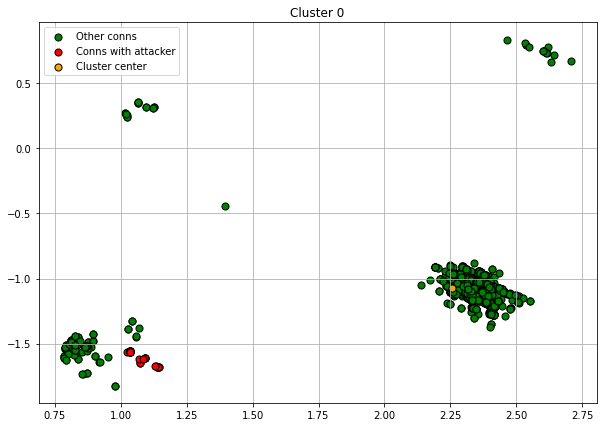

Total num of conns: 1953

Attacker conns ratio:
No     1919
Yes      34
Name: attacker_label, dtype: int64

IPs:
192.168.10.14    675
192.168.10.8     355
192.168.10.12    210
192.168.10.15    198
192.168.10.5     125
192.168.10.9     104
192.168.10.16    104
192.168.10.51     79
192.168.10.17     36
172.16.0.1        34
192.168.10.19     30
192.168.10.25      3
Name: originated_ip, dtype: int64

23.50.75.27        255
178.255.83.1       153
72.21.91.29        133
192.168.10.50      127
72.167.239.239      97
                  ... 
194.232.100.10       1
52.205.10.19         1
52.84.26.183         1
34.225.175.93        1
210.225.201.223      1
Name: responded_ip, Length: 362, dtype: int64

Time:
timestamp min = 2017-07-06T13:35:00.039148Z
timestamp max = 2017-07-06T14:04:59.064477Z

Cluster 0 NOK sample connections:


uid  originated_ip_num originated_ip  responded_ip_num  \
16846  CxA7Ms2T2m7ZI8SBe9            0.00000    172.16.0.1           0.75070   
5713   C9NcM51nUbvwHf48u6            0.00000    172.16.0.1           0.75070   
9044   CemiOB1IeSIBTjnnBi            0.00000    172.16.0.1           0.75070   
6880   CWshVq2MHGuq8In4kd            0.00000    172.16.0.1           0.75070   
9754    C9IwcXZafo9tZ26nj            0.00000    172.16.0.1           0.75070   
1504   CY9Smu3q1EKTU6HJ97            0.00000    172.16.0.1           0.75070   
2574   Cd3lec4WdA53l8EyK6            0.00000    172.16.0.1           0.75070   
7352   Cyx1us2ZjFVuuPcHYi            0.00000    172.16.0.1           0.75070   
12482  CxFYna19Kpo3TkhA5e            0.00000    172.16.0.1           0.75070   
6665    CKn9Gx3UZhgFfNmv5            0.00000    172.16.0.1           0.75070   
3933   CDtip31AM0eFBDiZq8            0.00000    172.16.0.1           0.75070   
16538  CReVrQ3aFuUEbEbiL4            0.00000    172.16.0.1           0.75070   
12930  C0NVJA2hN8YMc0YEad            0.00000    172.16.0.1           0.75070   
2786   CsR8tX3y4zwQ3xsrK3            0.00000    172.16.0.1           0.75070   
5167   CMiLHp3KDslCJMrDp1            0.00000    172.16.0.1           0.75070   

        responded_ip                    timestamp  connection.time  duration  \
16846  192.168.10.50  2017-07-06T13:35:27.852814Z          0.01547   5.03427   
5713   192.168.10.50  2017-07-06T13:35:00.925355Z          0.00051   0.00021   
9044   192.168.10.50  2017-07-06T13:35:01.926114Z          0.00106   0.00012   
6880   192.168.10.50  2017-07-06T13:35:14.735969Z          0.00818   5.19526   
9754   192.168.10.50  2017-07-06T13:42:12.265347Z          0.24027   5.00555   
1504   192.168.10.50  2017-07-06T13:35:05.700479Z          0.00316   5.22958   
2574   192.168.10.50  2017-07-06T13:40:33.464668Z          0.18535   5.08716   
7352   192.168.10.50   2017-07-06T13:35:12.14225Z          0.00674   5.78874   
12482  192.168.10.50  2017-07-06T13:41:54.064531Z          0.23015   5.01260   
6665   192.168.10.50  2017-07-06T13:35:00.414436Z          0.00022  20.92674   
3933   192.168.10.50  2017-07-06T13:35:00.655714Z          0.00036   5.27289   
16538  192.168.10.50  2017-07-06T13:41:46.489087Z          0.22594   5.00761   
12930  192.168.10.50  2017-07-06T13:35:33.777127Z          0.01877   5.02987   
2786   192.168.10.50   2017-07-06T13:35:45.73295Z          0.02541   6.55325   
5167   192.168.10.50  2017-07-06T13:35:03.204865Z          0.00177   5.72419   

       connection.duration protocol service conn_state  connection.orig_p  \
16846              0.00421      tcp    http         SF            0.55179   
5713               0.00000      tcp    none         SF            0.54767   
9044               0.00000      tcp    none         SF            0.54788   
6880               0.00434      tcp    none         SF            0.55075   
9754               0.00418      tcp    http         SF            0.55231   
1504               0.00437      tcp    none         SF            0.54932   
2574               0.00425      tcp    http         SF            0.55213   
7352               0.00484      tcp    none         SF            0.55033   
12482              0.00419      tcp    http         SF            0.55228   
6665               0.01748      tcp    none         SF            0.54333   
3933               0.00441      tcp    none         SF            0.54849   
16538              0.00418      tcp    http         SF            0.55225   
12930              0.00420      tcp    http         SF            0.55182   
2786               0.00547      tcp    http         SF            0.55195   
5167               0.00478      tcp    none         SF            0.54889   

       o_port       orig_p_cat  connection.orig_bytes  o_bytes  \
16846   36180  orig_reg_or_dyn                0.00923     1316   
5713    35910  orig_reg_or_dyn                0.00000        0   
9044    35924  orig_reg_or_dy

Cluster 0 OK sample connections:


uid  originated_ip_num  originated_ip  responded_ip_num  \
10596  CzLcI71IjPexe4PlN3            1.00000  192.168.10.14           0.74939   
3797    C1u1Ur4o6XwexicQ3            1.00000  192.168.10.16           0.75956   
15272  CGpv3f4vQeqStElqo3            1.00000  192.168.10.14           0.19795   
15777   C84FBv2bXZot7U8Mx            1.00000  192.168.10.15           0.69694   
11304  CSF9Up1fk9nRS1bKjg            1.00000  192.168.10.15           0.69694   
9658   CsfgeJ1XvhOIrMkFu4            1.00000  192.168.10.14           0.75580   
14912   C3d7UfWEuOTjXs6Ud            1.00000  192.168.10.14           0.50241   
8319   CmZpb31TUhpu3O5QJ8            1.00000   192.168.10.8           0.75645   
8478   CKCkG523R8XuMDrXM2            1.00000  192.168.10.16           0.67274   
999     CSoOakyUG6zO0B0Fj            1.00000  192.168.10.14           0.74939   
3254   Cj3Q094HgUktkTKfJ6            1.00000   192.168.10.5           0.27841   
1547   CFIb3U2BJHOh21uQzg            1.00000   192.168.10.5           0.40202   
10651  C4TLJA2QTh5Tf7gISj            1.00000  192.168.10.14           0.27967   
14113   CUsCnPDyhFrAIHZwi            1.00000   192.168.10.8           0.27841   
9329   CA9eJn3sN0atSJsyLg            1.00000  192.168.10.14           0.02461   

          responded_ip                    timestamp  connection.time  \
10596    192.82.242.30  2017-07-06T13:40:28.802736Z          0.18276   
3797   194.232.104.141  2017-07-06T13:58:53.753896Z          0.79694   
15272     52.54.31.228  2017-07-06T13:35:52.315717Z          0.02907   
15777     178.255.83.1  2017-07-06T13:41:27.761289Z          0.21553   
11304     178.255.83.1  2017-07-06T13:49:12.698049Z          0.47396   
9658    193.243.130.87  2017-07-06T13:53:51.834612Z          0.62912   
14912    129.146.13.97  2017-07-06T13:40:28.756301Z          0.18273   
8319      194.30.48.30     2017-07-06T13:51:35.432Z          0.55330   
8478     172.217.1.174  2017-07-06T13:54:23.361268Z          0.64665   
999      192.82.242.30  2017-07-06T13:40:28.802677Z          0.18276   
3254    72.167.239.239  2017-07-06T13:38:12.744638Z          0.10713   
1547     104.16.26.216  2017-07-06T13:53:54.298986Z          0.63049   
10651    72.249.192.59  2017-07-06T13:35:53.681864Z          0.02983   
14113   72.167.239.239  2017-07-06T13:43:37.162861Z          0.28746   
9329        8.43.72.97  2017-07-06T13:36:00.180498Z          0.03344   

       duration  connection.duration protocol service conn_state  \
10596   5.61652              0.00469      tcp    none         SF   
3797    5.54679              0.00463      tcp    none         SF   
15272  61.12584              0.05107      tcp    http         SF   
15777   0.04961              0.00004      tcp    http         SF   
11304   0.06006              0.00005      tcp    http         SF   
9658    0.63662              0.00053      tcp    http         SF   
14912   5.72657              0.00478      tcp    none         SF   
8319    0.43245              0.00036      tcp    http         SF   
8478  116.08537              0.09698      tcp    http         SF   
999   116.07052              0.09697      tcp    http         SF   
3254    5.98802              0.00500      tcp    none         SF   
1547    5.26189              0.00440      tcp    none         SF   
10651 115.46981              0.09647      tcp    http         SF   
14113   0.08601              0.00007      tcp    http         SF   
9329  115.99391              0.09690      tcp    http         SF   

       connection.orig_p  o_port       orig_p_cat  connection.orig_bytes  \
10596            0.93786   61464  orig_reg_or_dyn                0.00000   
3797             0.79335   52000  orig_reg_or_dyn                0.00000   
15272            0.92992   60944  orig_reg_or_dyn                0.00285   
15777            0.81741   53576  orig_reg_or_dyn                0.00306   
11304            0.82457   54045  orig_reg_or_dyn                0.00306   
9658             0.94108   

Protocol:
tcp    1952
udp       1
Name: protocol, dtype: int64

Service:
http        1351
none         509
ssh           63
ftp           15
ftp-data      15
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    1953
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_80     1851
resp_22       63
resp_21       15
resp_reg      13
resp_dyn       8
resp_443       3
Name: resp_p_cat, dtype: int64




Total num of conns: 3511

Attacker conns ratio:
No    3511
Name: attacker_label, dtype: int64

IPs:
192.168.10.8     815
192.168.10.12    571
192.168.10.15    549
192.168.10.14    328
192.168.10.9     286
192.168.10.5     284
192.168.10.51    249
192.168.10.16    144
192.168.10.19    106
192.168.10.25     91
192.168.10.17     82
192.168.10.3       6
Name: originated_ip, dtype: int64

87.106.49.27      73
162.213.33.50     56
74.117.200.68     42
172.217.10.66     32
62.161.94.230     27
                  ..
34.205.1.52        1
52.205.153.11      1
34.200.58.169      1
176.119.54.230     1
151.101.0.133      1
Name: responded_ip, Length: 1110, dtype: int64

Time:
timestamp min = 2017-07-06T13:35:00.012744Z
timestamp max = 2017-07-06T14:04:47.086763Z

Cluster 1 OK sample connections:


uid  originated_ip_num  originated_ip  responded_ip_num  \
8663   Co7SNC3mVRdV82Mp3f            1.00000   192.168.10.5           0.20768   
2865   C9LVC839IaVqhFbmyg            1.00000   192.168.10.8           0.12933   
8360   CvohEl3WpfAd9L9Xw7            1.00000  192.168.10.15           0.40313   
10279  CbGblC1vSiDr72HKH9            1.00000  192.168.10.51           0.67633   
10166  CUxlqX19bKguBzDqr1            1.00000   192.168.10.5           0.19841   
13335  CxKkd144Ql7U861kgl            1.00000   192.168.10.8           0.77252   
338    CZvjlw1exhNQId73Qk            1.00000  192.168.10.51           0.67274   
2282   CR5Boh1fJrdAKVZcC8            1.00000  192.168.10.14           0.67274   
15866  CdV2hT3BT8FIJGLYEk            1.00000   192.168.10.5           0.19820   
2430   C83XKF3etg77lIX0pi            1.00000   192.168.10.9           0.08332   
6067   Cq3yH949MtmXfiXm9j            1.00000   192.168.10.5           0.84316   
15770  CDLom83iE5P7HyYSug            1.00000   192.168.10.9           0.74812   
7907   CtB9b640cvX6B2zX2k            1.00000  192.168.10.16           0.49670   
11613  CqVE0e1MmVzY7W3MT5            1.00000  192.168.10.12           0.26668   
1383   CAmpm63zlqsvv4OYAb            1.00000   192.168.10.5           0.19841   

          responded_ip                    timestamp  connection.time  \
8663    54.174.185.190  2017-07-06T13:53:39.731307Z          0.62239   
2865      34.198.116.1  2017-07-06T13:43:37.014862Z          0.28737   
8360     104.88.101.94  2017-07-06T13:41:27.165086Z          0.21520   
10279  173.194.206.154  2017-07-06T13:53:40.290584Z          0.62270   
10166      52.84.40.37  2017-07-06T13:53:37.597954Z          0.62121   
13335   198.51.152.178  2017-07-06T13:43:36.431131Z          0.28705   
338       172.217.10.3  2017-07-06T13:53:36.393273Z          0.62054   
2282    172.217.12.132  2017-07-06T13:53:54.226302Z          0.63045   
15866     52.70.92.239  2017-07-06T13:54:00.590953Z          0.63399   
2430       23.21.222.6    2017-07-06T13:58:52.6589Z          0.79633   
6067      216.38.80.71  2017-07-06T13:46:14.315538Z          0.37481   
15770       192.0.72.3  2017-07-06T13:58:48.028795Z          0.79376   
7907     128.30.52.100  2017-07-06T13:40:59.789958Z          0.19998   
11613    69.172.216.55   2017-07-06T14:01:27.65092Z          0.88249   
1383       52.84.26.18   2017-07-06T13:53:37.50736Z          0.62116   

       duration  connection.duration protocol service conn_state  \
8663   20.23147              0.01690      tcp     ssl         SF   
2865    5.42576              0.00453      tcp     ssl         SF   
8360  116.18307              0.09706      tcp     ssl       RSTR   
10279 115.62845              0.09660      tcp     ssl         SF   
10166 115.54790              0.09653      tcp     ssl         SF   
13335   5.30619              0.00443      tcp     ssl         SF   
338     0.69749              0.00058      tcp     ssl       RSTO   
2282   42.52895              0.03553      tcp     ssl       RSTO   
15866  14.75115              0.01232      tcp     ssl         SF   
2430   61.69965              0.05155      tcp     ssl         SF   
6067    3.00066              0.00251      tcp    none         S0   
15770   1.08717              0.00091      tcp     ssl         SF   
7907    2.23251              0.00187      tcp     ssl         SF   
11613   0.88946              0.00074      tcp     ssl         SF   
1383  117.64899              0.09829      tcp     ssl         SF   

       connection.orig_p  o_port       orig_p_cat  connection.orig_bytes  \
8663             0.78026   51143  orig_reg_or_dyn                0.01298   
2865             0.76460   50117  orig_reg_or_dyn                0.00248   
8360             0.81717   53560  orig_reg_or_dyn                0.00528   
10279            0.71700   47000  orig_reg_or_dyn                0.01902   
10166            0.77988   51118  orig_reg_or_dyn                0.00515   
13335            0.76400   

Protocol:
tcp    3511
Name: protocol, dtype: int64

Service:
ssl     3345
none     166
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    3511
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_443           3491
resp_well_known      20
Name: resp_p_cat, dtype: int64




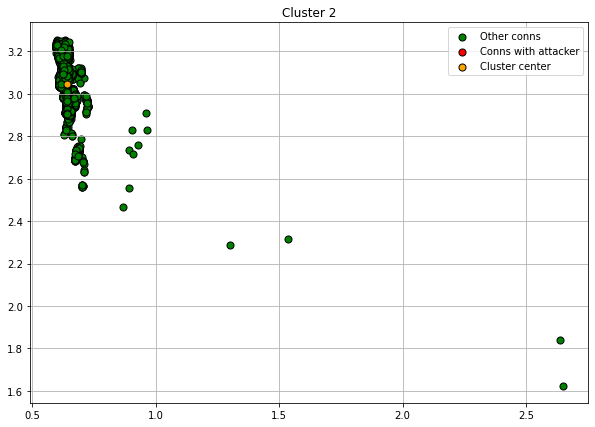

Total num of conns: 3746

Attacker conns ratio:
No    3746
Name: attacker_label, dtype: int64

IPs:
192.168.10.3    3746
Name: originated_ip, dtype: int64

192.168.10.1      3734
192.168.10.255      10
65.52.108.189        1
65.52.108.231        1
Name: responded_ip, dtype: int64

Time:
timestamp min = 2017-07-06T13:35:04.537058Z
timestamp max = 2017-07-06T14:04:47.085873Z

Cluster 2 OK sample connections:


uid  originated_ip_num originated_ip  responded_ip_num  \
7044   CwEg0e21bTyHooFsrd            1.00000  192.168.10.3           0.75070   
4837   CDYGzS24GVd77ASycc            1.00000  192.168.10.3           0.75070   
2357   CUDN7h2Y8G4ThnrCb2            1.00000  192.168.10.3           0.75070   
183    CjBQhZ23zsm98yW5I6            1.00000  192.168.10.3           0.75070   
1923   CavWl83SXqXbQEjFEd            1.00000  192.168.10.3           0.75070   
4166   COgDQP3BYFAbxeGmrl            1.00000  192.168.10.3           0.75070   
7558   CYGWQ33xTmbZ0LI8G5            1.00000  192.168.10.3           0.75070   
16599  CEshXH3MYAtjrlyOA3            1.00000  192.168.10.3           0.75070   
17219  Cp5mOg23lGmRalI9jh            1.00000  192.168.10.3           0.75070   
12562  CgmJiv24HocNIK4Kki            1.00000  192.168.10.3           0.75070   
7703   CyoShw1DNQ09Ii1Ybe            1.00000  192.168.10.3           0.75070   
4258   CtZTts4shKVt4LH6Fi            1.00000  192.168.10.3           0.75070   
7751   Cw0GL64mooyUHmwAfd            1.00000  192.168.10.3           0.75070   
3015    CAMGTZLAYRWdeLQsl            1.00000  192.168.10.3           0.75070   
10430  Cu1uAo2ijNjA5szWg8            1.00000  192.168.10.3           0.75070   

       responded_ip                    timestamp  connection.time  duration  \
7044   192.168.10.1  2017-07-06T13:49:45.239093Z          0.49205   0.04617   
4837   192.168.10.1  2017-07-06T13:41:29.943762Z          0.21674   0.03047   
2357   192.168.10.1  2017-07-06T13:40:27.973148Z          0.18230   0.13037   
183    192.168.10.1  2017-07-06T13:58:50.518413Z          0.79514   0.02326   
1923   192.168.10.1  2017-07-06T13:58:48.224079Z          0.79387   0.02470   
4166   192.168.10.1  2017-07-06T13:45:19.769405Z          0.34449   0.03060   
7558   192.168.10.1  2017-07-06T13:40:29.400367Z          0.18309   0.03049   
16599  192.168.10.1  2017-07-06T13:35:51.778639Z          0.02877   0.03069   
17219  192.168.10.1  2017-07-06T13:51:38.736813Z          0.55514   0.11360   
12562  192.168.10.1  2017-07-06T13:51:11.600659Z          0.54006   0.03071   
7703   192.168.10.1  2017-07-06T13:44:57.660242Z          0.33220   0.06220   
4258   192.168.10.1  2017-07-06T13:49:17.457786Z          0.47661   0.03070   
7751   192.168.10.1  2017-07-06T13:43:36.484621Z          0.28708   0.03029   
3015   192.168.10.1  2017-07-06T13:40:26.850012Z          0.18167   0.03041   
10430  192.168.10.1  2017-07-06T13:39:32.689372Z          0.15157   0.03102   

       connection.duration protocol service conn_state  connection.orig_p  \
7044               0.00004      udp     dns         SF            0.92820   
4837               0.00003      udp     dns         SF            0.92057   
2357               0.00011      udp     dns         SF            0.95377   
183                0.00002      udp     dns         SF            0.92582   
1923               0.00002      udp     dns         SF            0.92796   
4166               0.00003      udp     dns         SF            0.92630   
7558               0.00003      udp     dns         SF            0.95241   
16599              0.00003      udp     dns         SF            0.92764   
17219              0.00009      udp     dns         SF            0.94208   
12562              0.00003      udp     dns         SF            0.93079   
7703               0.00005      udp     dns         SF            0.95002   
4258               0.00003      udp     dns         SF            0.94453   
7751               0.00003      udp     dns         SF            0.94984   
3015               0.00003      udp     dns         SF            0.95186   
10430              0.00003      udp     dns         SF            0.92584   

       o_port       orig_p_cat  connection.orig_bytes  o_bytes  \
7044    60832  orig_reg_or_dyn                0.00034       48   
4837    60332  orig_reg_or_dyn                0.00030       43   
2357    62506  orig_reg_or_dyn               

Protocol:
udp    3744
tcp       2
Name: protocol, dtype: int64

Service:
dns     3742
none       4
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    3736
orig_well_known      10
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_53            3734
resp_well_known      10
resp_443              2
Name: resp_p_cat, dtype: int64




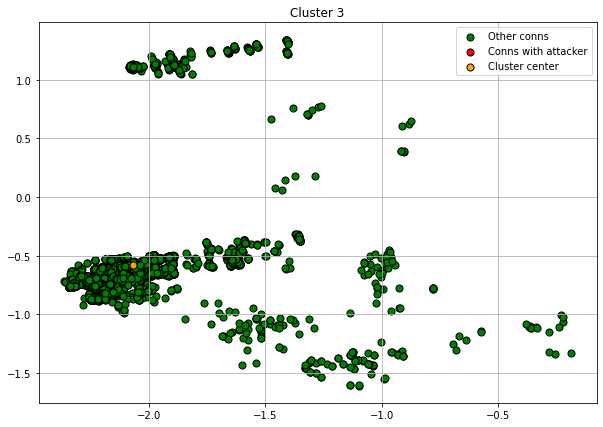

Total num of conns: 8247

Attacker conns ratio:
No    8247
Name: attacker_label, dtype: int64

IPs:
192.168.10.8     2029
192.168.10.14    1661
192.168.10.15    1250
192.168.10.12     831
192.168.10.5      616
192.168.10.9      558
192.168.10.19     383
192.168.10.16     344
192.168.10.51     249
192.168.10.17     233
192.168.10.25      85
192.168.10.50       8
Name: originated_ip, dtype: int64

192.168.10.3     8200
192.168.10.19      47
Name: responded_ip, dtype: int64

Time:
timestamp min = 2017-07-06T13:35:04.536755Z
timestamp max = 2017-07-06T14:04:55.052295Z

Cluster 3 OK sample connections:


uid  originated_ip_num  originated_ip  responded_ip_num  \
10762  C256Y94LLImh6IXD4h            1.00000   192.168.10.9           0.75070   
16505  CRBW6G3f6EB4KKaoS9            1.00000  192.168.10.16           0.75070   
15053   C870uGXUTcBmbgdwh            1.00000  192.168.10.14           0.75070   
2578   C9wzmi207n4AislR02            1.00000  192.168.10.16           0.75070   
7288   CwN2sU3kQrUvUUViyg            1.00000   192.168.10.8           0.75070   
17794  CiV1Cz3BE7CE7I8pYf            1.00000   192.168.10.8           0.75070   
9882   COkqIO2F3J0WpFD1C4            1.00000  192.168.10.17           0.75070   
14388    CfRpfV3wu1nkq7li            1.00000   192.168.10.8           0.75070   
4885   CGXECa4DaiwDL4Cgkj            1.00000   192.168.10.8           0.75070   
17268  CRC2rS27AIcPa0dgla            1.00000  192.168.10.12           0.75070   
15561  CM2fsJ3MSETvO1Wgzc            1.00000  192.168.10.14           0.75070   
12736  CbcX7i4VGm5OgNt5C1            1.00000   192.168.10.9           0.75070   
16532  CloedL1Y0luPlCPKQ8            1.00000  192.168.10.19           0.75070   
5874   CE5K4M1avnRwIld1h1            1.00000   192.168.10.9           0.75070   
17239  C04nDS32MEhKVw3qje            1.00000   192.168.10.5           0.75070   

       responded_ip                    timestamp  connection.time  duration  \
10762  192.168.10.3  2017-07-06T13:58:48.223922Z          0.79387   0.02516   
16505  192.168.10.3   2017-07-06T13:40:56.96534Z          0.19841   0.03151   
15053  192.168.10.3  2017-07-06T13:35:52.321841Z          0.02908   0.03089   
2578   192.168.10.3  2017-07-06T13:58:55.415964Z          0.79787   0.34150   
7288   192.168.10.3  2017-07-06T13:54:22.596511Z          0.64622   0.00024   
17794  192.168.10.3  2017-07-06T13:46:14.747369Z          0.37505   0.06146   
9882   192.168.10.3  2017-07-06T13:51:46.054395Z          0.55921   0.25984   
14388  192.168.10.3  2017-07-06T13:51:41.022882Z          0.55641   0.06102   
4885   192.168.10.3  2017-07-06T13:54:20.084211Z          0.64482   0.00014   
17268  192.168.10.3  2017-07-06T14:01:30.551984Z          0.88410   0.06268   
15561  192.168.10.3  2017-07-06T13:48:56.587052Z          0.46501   0.03132   
12736  192.168.10.3   2017-07-06T13:52:04.00502Z          0.56918   0.00014   
16532  192.168.10.3  2017-07-06T13:41:16.093569Z          0.20904   0.00021   
5874   192.168.10.3  2017-07-06T13:59:35.418294Z          0.82010   0.00014   
17239  192.168.10.3  2017-07-06T13:53:58.655186Z          0.63291   0.03110   

       connection.duration protocol service conn_state  connection.orig_p  \
10762              0.00002      udp     dns         SF            0.87727   
16505              0.00003      udp     dns         SF            0.96465   
15053              0.00003      udp     dns         SF            0.90535   
2578               0.00029      udp     dns         SF            0.60354   
7288               0.00000      udp     dns         SF            0.77374   
17794              0.00005      udp     dns         SF            0.88524   
9882               0.00022      udp     dns         SF            0.78310   
14388              0.00005      udp     dns         SF            0.78234   
4885               0.00000      udp     dns         SF            0.75742   
17268              0.00005      udp     dns         SF            0.54043   
15561              0.00003      udp     dns         SF            0.99334   
12736              0.00000      udp     dns         SF            0.75183   
16532              0.00000      udp     dns         SF            0.97284   
5874               0.00000      udp     dns         SF            0.77556   
17239              0.00003      udp     dns         SF            0.98157   

       o_port       orig_p_cat  connection.orig_bytes  o_bytes  \
10762   57496  orig_reg_or_dyn                0.00055       78   
16505   63219  orig_reg_or_dyn                0.00052       74   
15053   59335  orig_reg_or_dy

Protocol:
udp    8151
tcp      96
Name: protocol, dtype: int64

Service:
dns                   8075
none                    64
ntp                     40
dce_rpc                 24
krb                     13
gssapi,smb,krb          11
gssapi,smb,dce_rpc      10
krb_tcp                  8
gssapi,ntlm,smb          2
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    8168
orig_well_known      79
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_53            8026
resp_well_known     157
resp_123             40
resp_dyn             13
resp_reg             11
Name: resp_p_cat, dtype: int64




Total num of conns: 451

Attacker conns ratio:
No    451
Name: attacker_label, dtype: int64

IPs:
192.168.10.17    138
192.168.10.19    136
192.168.10.50     52
192.168.10.25     48
192.168.10.12     36
192.168.10.16     36
192.168.10.14      1
192.168.10.8       1
192.168.10.3       1
192.168.10.15      1
192.168.10.5       1
Name: originated_ip, dtype: int64

192.168.10.255     59
17.253.14.253      28
167.114.204.238    21
144.217.148.73     21
91.189.89.199      20
159.203.8.72       15
206.108.0.132      14
72.38.129.202      14
91.189.91.157      14
67.215.197.149     14
91.189.89.198      13
129.128.12.20      13
195.186.4.101       7
213.109.127.82      7
158.69.125.231      7
198.50.139.209      7
199.182.221.110     7
5.9.74.228          7
206.108.0.133       7
208.81.1.197        7
192.95.27.155       7
99.224.25.39        7
144.217.109.67      7
4.53.160.75         7
66.70.172.17        7
97.127.97.146       7
207.210.46.249      7
163.172.10.212      7
206.108.0.134       

uid  originated_ip_num  originated_ip  responded_ip_num  \
2976   Cx2Jmu4h8JTMAJPzu6            1.00000  192.168.10.50           0.75070   
16006  CCHtbR17dz1beKWoO7            1.00000  192.168.10.19           0.28948   
1792   CipRca2gn1hBdPf6q8            1.00000  192.168.10.17           0.50214   
10998   CXPx3P5cs90Fovtal            1.00000  192.168.10.19           0.35352   
7253   CIhkCG1fB1ej1cCMRg            1.00000  192.168.10.17           0.61537   
13373   Cr9sH2JMjpEF6wqK8            1.00000  192.168.10.19           0.65149   
8725   CON80i2wEBEz6uKzli            1.00000  192.168.10.17           0.50214   
3838    CWGvDgCQ3TRAuoLGg            1.00000  192.168.10.19           0.28948   
2779   Cb3oh74ng912gq9Tc2            1.00000  192.168.10.50           0.87406   
5879   Ck05rh1CFA4bRTMWnf            1.00000  192.168.10.17           0.25331   
8610   Co8Qty2Bo180vUJ5l3            1.00000  192.168.10.19           0.65149   
16197  C27n4m42WHeJkuedzi            1.00000  192.168.10.17           0.35352   
16042  CLSZmK3FSnvfn0FA21            1.00000  192.168.10.16           0.37618   
15685  CM2va023pySeBIp2h8            1.00000  192.168.10.17           0.77848   
15490  CSVNGZ3HM7xz9k3Cc5            1.00000  192.168.10.19           0.63663   

          responded_ip                    timestamp  connection.time  \
2976    192.168.10.255  2017-07-06T14:01:05.795849Z          0.87034   
16006    75.119.251.14  2017-07-06T14:01:31.272193Z          0.88450   
1792     129.128.12.20  2017-07-06T13:52:09.035621Z          0.57198   
10998    91.189.89.198  2017-07-06T13:52:16.271996Z          0.57600   
7253    158.69.125.231  2017-07-06T14:01:20.035589Z          0.87825   
13373  167.114.204.238  2017-07-06T13:57:15.272091Z          0.74220   
8725     129.128.12.20    2017-07-06T13:43:26.0358Z          0.28127   
3838     75.119.251.14  2017-07-06T13:39:42.271734Z          0.15689   
2779       224.0.0.251  2017-07-06T13:56:29.214531Z          0.71660   
5879      66.70.172.17  2017-07-06T13:48:19.035656Z          0.44414   
8610   167.114.204.238  2017-07-06T13:35:16.271653Z          0.00904   
16197    91.189.89.199  2017-07-06T14:01:39.035582Z          0.88881   
16042    97.127.97.146    2017-07-06T13:48:39.0767Z          0.45528   
15685  199.182.221.110   2017-07-06T13:35:37.03594Z          0.02058   
15490   163.172.10.212  2017-07-06T13:44:56.271877Z          0.33143   

       duration  connection.duration protocol service conn_state  \
2976    0.00002              0.00000      udp     dns         S0   
16006   0.03825              0.00003      udp     ntp         SF   
1792    0.09351              0.00008      udp     ntp         SF   
10998   0.09420              0.00008      udp     ntp         SF   
7253    0.01650              0.00001      udp     ntp         SF   
13373   0.01609              0.00001      udp     ntp         SF   
8725    0.09298              0.00008      udp     ntp         SF   
3838    0.03843              0.00003      udp     ntp         SF   
2779    3.76750              0.00315      udp     dns         S0   
5879    0.01653              0.00001      udp     ntp         SF   
8610    0.01602              0.00001      udp     ntp         SF   
16197   0.09414              0.00008      udp     ntp         SF   
16042   0.05071              0.00004      udp     ntp         SF   
15685   0.07200              0.00006      udp     ntp         SF   
15490   0.09722              0.00008      udp     ntp         SF   

       connection.orig_p  o_port       orig_p_cat  connection.orig_bytes  \
2976             0.00145     137  orig_well_known                0.00456   
16006            0.00124     123  orig_well_known                0.00034   
1792             0.00124     123  orig_well_known                0.00034   
10998            0.00124     123  orig_well_known                0.00034   
7253             0.00124     123  orig_well_known                0.00034   
13373            0.00124   

Protocol:
udp    451
Name: protocol, dtype: int64

Service:
ntp     378
dns      53
none     20
Name: service, dtype: int64

Orig_p_cat:
orig_well_known    429
orig_reg_or_dyn     22
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_123           378
resp_well_known     61
resp_reg            12
Name: resp_p_cat, dtype: int64




In [90]:
for i in range(OPTIMAL_K + 1):
    result_cluster = result.loc[result['cluster'] == i]
    nok_conns = result_cluster.loc[(result_cluster['attacker_label'] == 'Yes') & (result_cluster['victim_label'] == 'Yes')]
    ok_conns = result_cluster.loc[(result_cluster['attacker_label'] == 'No') | ((result_cluster['attacker_label'] == 'Yes') & (result_cluster['victim_label'] != 'Yes'))]
      
    plt.scatter(
        ok_conns[0], ok_conns[1],
        s=50, c='green',
        marker='o', edgecolor='black',
        label='Other conns'
    )
    
    plt.scatter(
        nok_conns[0], nok_conns[1],
        s=50, c='red',
        marker='o', edgecolor='black',
        label='Conns with attacker'
    )
    
    plt.scatter(
        kmeans.cluster_centers_[i][0], kmeans.cluster_centers_[i][1],
        s=50, c='orange',
        marker='o', edgecolor='black',
        label='Cluster center'
    )
    
    plt.legend(scatterpoints=1)
    plt.title('Cluster ' + str(i))
    plt.grid()
    plt.show()
    
    print('Total num of conns: ' + str(result_cluster.shape[0]) + '\n')
    
    
    print('Attacker conns ratio:')
    print_df_func(result_cluster, 'attacker_label', 'count')
    
    print('IPs:')
    print_df_func(result_cluster, 'originated_ip', 'count')
    print_df_func(result_cluster, 'responded_ip', 'count')
    
    print('Time:')
    print_df_func(result_cluster, 'timestamp', 'min')
    print_df_func(result_cluster, 'timestamp', 'max')

    if len(nok_conns) > 0:
        print('Cluster ' + str(i) + ' NOK sample connections:')
        samples = nok_conns.sample(15 if len(nok_conns) >= 15 else len(nok_conns))
        samples = samples.filter(INTERPRETATION_COLS, axis=1)
        display(samples)
    
    if len(ok_conns) > 0:
        print('Cluster ' + str(i) + ' OK sample connections:')
        samples = ok_conns.sample(15 if len(ok_conns) >= 15 else len(ok_conns))
        samples = samples.filter(INTERPRETATION_COLS, axis=1)
        display(samples)
    
    print('Protocol:')
    print_df_func(result_cluster, 'protocol', 'count')
    
    print('Service:')
    print_df_func(result_cluster, 'service', 'count')
    
    print('Orig_p_cat:')
    print_df_func(result_cluster, 'orig_p_cat', 'count')
    
    print('Resp_p_cat:')
    print_df_func(result_cluster, 'resp_p_cat', 'count')
    
    print('  ================================================  \n')
    

## Evaluation

**Rand index** *can't be used, requires labels.. (https://scikit-learn.org/stable/modules/clustering.html#rand-index)*


Notation: set `S = {1, 2, .. n}` of `x > 2` points, distance function `d(i,j)` measures distance between 2 points from S (d can be Euclidean, Manhattan, Chebyshev, Mahalanobis, .. alternatively similarity function can be used)


#### 3 axioms of Jon Kleinberg: 

- characteristics that a grouping problem shuld exhibit and can be considered "good", independently of alg used to find solution

1. **scale invariance**: `f(d) == f(alfa*d)` for any d and alfa > 0

2. **consistency**: if for every (i,j) from same cluster `d(i,j) >= d'(i,j)` and from different clusters `d(i,j) < d'(i,j)` then `f(d) == f(d')`

3. **wealth, richness**: every partition of S is a possible result of the clustering process

For every n >= 2 there is no clustering alg. that satysfies all three at once. 

2 measure of internal metrics: 

**cohesion** = between points in same cluster

**separation** = between points from different clusters



### Sum of Squared Error (SSE) 

(https://stackoverflow.com/questions/43784903/scikit-k-means-clustering-performance-measure)

Elbow Criterion 

- not available as a function in Scikit (we need to calculate SSE to evaluate K-Means using Elbow Criterion)

**Idea of Elbow Criterion method: choose `k` (number of cluster) at which the SSE decreases abruptly.**

(Small values indicate good quality.)

SSE = sum of squared distance between each member of the cluster and its centroid

SSE tends to decrease toward 0 as we increase k (SSE=0, when k is equal to the number of data points in the dataset, because then each data point is its own cluster, and there is no error between it and the center of its cluster).

=> goal: choose a small value of k that still has a low SSE, and the elbow usually represents, where we start to have diminishing returns by increasing k

If the line graph looks like an arm, the "elbow" on the arm is the value of optimal k (number of cluster). 

## Metrics that quantify level of separation and cohesion in a single measure:

### Silhouette Score

- used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other
- is calculated for each sample of different clusters
- to calculate the Silhouette score for each observation/data point, the following distances need to be found out for each observations belonging to all the clusters: Mean distance between the observation and all other data points in the same cluster. This distance can also be called a mean intra-cluster distance. The mean distance is denoted by a. Mean distance between the observation and all other data points of the next nearest cluster. This distance can also be called a mean nearest-cluster distance. The mean distance is denoted by b.

Silhouette score, S, for each sample is calculated using the following formula:

```
Silhouette Score = (average intra-cluster distance - average inter-cluster distance) / 
                   max(average inter-cluster distance, average intra-cluster distance)

```

- intra-cluster distance = average distance between each point within a cluster
- inter-cluster distance = average distance between all clusters

Value of Silhouette score varies from -1 to 1. If the score is 1, the cluster is dense and well-separated than other clusters. A value near 0 represents overlapping clusters with samples very close to the decision boundary of the neighboring clusters. A negative score [-1, 0] indicates that the samples might have got assigned to the wrong clusters.

Single pass eval:

In [40]:
from sklearn.metrics import davies_bouldin_score
from sklearn import metrics

sse = {}
sil = {}
ch = {}
db = {}

from sklearn.cluster import KMeans
from sklearn import metrics

for k in range(2, len(computed_clusters)):
# for k in range(OPTIMAL_K, OPTIMAL_K + 1):
    print('Start at ' + datetime.now().strftime("%H:%M:%S") + '.')
    
    km = computed_clusters[k]
    km_fit = computed_clusters_fitted[k]
    
    print('K=' + str(k + 1) + ' clusters: ')
    
    sse_score = km_fit.inertia_   
    sse[k] = sse_score
    print('Sum of Squared Error for k = ' + str(k + 1) + ': ' + str(sse_score))
    
    ch_score = metrics.calinski_harabasz_score(pca_X, km_fit.labels_)
    ch[k] = ch_score
    print('Calisnki-Harabasz Coefficient for k = ' + str(k + 1) + ': ' + str(ch_score))
    
    db_score = davies_bouldin_score(pca_X, km_fit.labels_)
    db[k] = db_score
    print('Davies-Bouldin Index for k = ' + str(k + 1) + ': ' + str(db_score))
    
    sil_score = metrics.silhouette_score(pca_X, km.labels_, metric='euclidean')
    sil[k] = sil_score
    print('Silhouette Score for k = ' + str(k + 1) + ': ' + str(sil_score))
    
    print('End at ' + datetime.now().strftime("%H:%M:%S") + '.')
    
    print('--')

Start at 00:27:16.
K=3 clusters: 
Sum of Squared Error for k = 3: 56145.844451069286
Calisnki-Harabasz Coefficient for k = 3: 20504.340161668093
Davies-Bouldin Index for k = 3: 0.6926771960095386
Silhouette Score for k = 3: 0.5661787268138322
End at 00:27:21.
--
Start at 00:27:21.
K=4 clusters: 
Sum of Squared Error for k = 4: 46267.31466865205
Calisnki-Harabasz Coefficient for k = 4: 17347.195663953422
Davies-Bouldin Index for k = 4: 1.0922971056614017
Silhouette Score for k = 4: 0.5532544144277046
End at 00:27:25.
--
Start at 00:27:25.
K=5 clusters: 
Sum of Squared Error for k = 5: 41389.03265716561
Calisnki-Harabasz Coefficient for k = 5: 19057.397818342673
Davies-Bouldin Index for k = 5: 0.8417212982239446
Silhouette Score for k = 5: 0.5831559667672642
End at 00:27:30.
--
Start at 00:27:30.
K=6 clusters: 
Sum of Squared Error for k = 6: 37978.96567415197
Calisnki-Harabasz Coefficient for k = 6: 16929.979827013296
Davies-Bouldin Index for k = 6: 1.2469973708699602
Silhouette Score f

In [41]:
sse

{2: 56145.844451069286,
 3: 46267.31466865205,
 4: 41389.03265716561,
 5: 37978.96567415197,
 6: 36107.01468996593,
 7: 34271.54158398076,
 8: 32534.706278986894,
 9: 30074.730401887467,
 10: 29208.927053786105,
 11: 28779.52654038269,
 12: 28059.732692986574,
 13: 26592.713860849268,
 14: 26051.92109436666,
 15: 24357.688499523054,
 16: 23916.745288838727,
 17: 23371.600408644746,
 18: 22567.56332574578,
 19: 22252.664691824557,
 20: 21856.71561181897,
 21: 21448.768567628118,
 22: 21074.025494337482,
 23: 20633.15822976138}

In [42]:
ch

{2: 20504.340161668093,
 3: 17347.195663953422,
 4: 19057.397818342673,
 5: 16929.979827013296,
 6: 14992.396390524309,
 7: 13674.772677033263,
 8: 12615.128827354689,
 9: 12283.876775808463,
 10: 11432.408721419319,
 11: 10514.665354345167,
 12: 9973.189247855222,
 13: 9833.45149797378,
 14: 8449.48670474089,
 15: 9390.338916563833,
 16: 8984.573400819301,
 17: 8675.770926130932,
 18: 8493.91065100586,
 19: 8175.103977929201,
 20: 7921.229970468014,
 21: 7701.653390390398,
 22: 7489.632950993409,
 23: 7331.539680429254}

In [43]:
db

{2: 0.6926771960095386,
 3: 1.0922971056614017,
 4: 0.8417212982239446,
 5: 1.2469973708699602,
 6: 1.352415541230774,
 7: 1.325945588968026,
 8: 1.5088656382631893,
 9: 1.317218091930578,
 10: 1.2906123232340672,
 11: 1.3349391359327818,
 12: 1.2241634811457927,
 13: 1.3788153065783608,
 14: 1.5236478078095705,
 15: 1.3850264939304848,
 16: 1.4111904251846072,
 17: 1.479128672529424,
 18: 1.4379243591990185,
 19: 1.4110365765328248,
 20: 1.4481573050641132,
 21: 1.4310853911762196,
 22: 1.2735525932072707,
 23: 1.3479638222343715}

In [44]:
sil

{2: 0.5661787268138322,
 3: 0.5532544144277046,
 4: 0.5831559667672642,
 5: 0.40111316510917083,
 6: 0.4067571442137547,
 7: 0.42068995141324705,
 8: 0.4111343138853549,
 9: 0.4245468003862419,
 10: 0.4359193056281699,
 11: 0.3187370161129487,
 12: 0.4400315913354078,
 13: 0.316999079642359,
 14: 0.3272786599827601,
 15: 0.3772865094905145,
 16: 0.3629244887303222,
 17: 0.3636890605554917,
 18: 0.36793324189362975,
 19: 0.3706809207830957,
 20: 0.38288703104531474,
 21: 0.39102550825412674,
 22: 0.35084494012573314,
 23: 0.35591699194902937}

In [45]:
# 1: clusters are clearly distinguished
# 0: distance between clusters is not significant ('data are uniformly distributed throughout Euclidean space')
# -1: clusters are assigned the wrong way

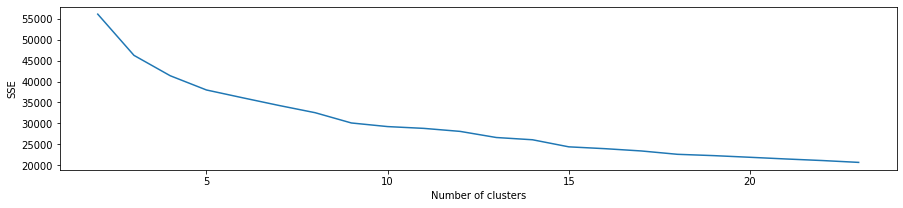

In [46]:
# import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15,3)
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

In [47]:
# plt.rcParams["figure.figsize"] = (15,3)
# plt.figure()
# sse_to_10 = { k: v for k, v in sse.items() if k <= 10 }  # zoom in
# plt.plot(list(sse_to_10.keys()), list(sse_to_10.values()))
# plt.xlabel("Number of clusters")
# plt.ylabel("SSE")
# plt.show()

In [48]:
plt.rcParams["figure.figsize"] = (15,3)
plt.figure()
plt.plot(list(sil.keys()), list(sil.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.show()

## Interpretation

Parallel coordinates plots.

In [91]:
features_df = labels_df[['originated_ip_num', 
                     'responded_ip_num', 
                     'connection.time', 
                     'connection.duration', 
                     'connection.orig_p', 'connection.resp_p', 
                     'connection.orig_bytes', 'connection.resp_bytes', 
                     'connection.orig_pkts', 'connection.resp_pkts', 
                     'dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count']]

coord_vis_df = pd.concat([features_df, pca_X['cluster']], axis=1)
coord_vis_df = coord_vis_df #.sample(100)

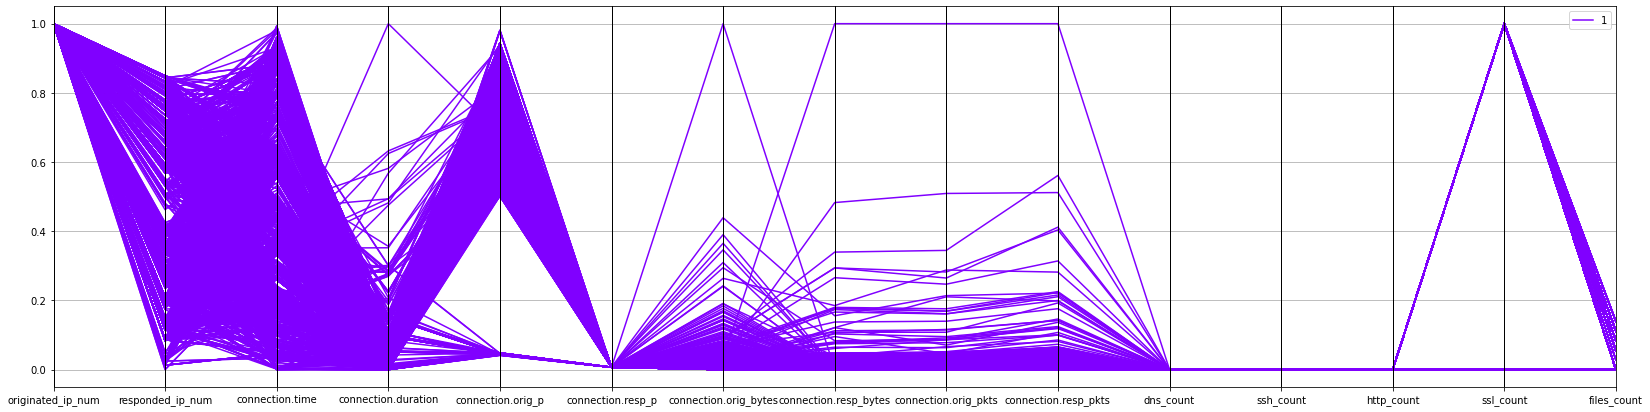

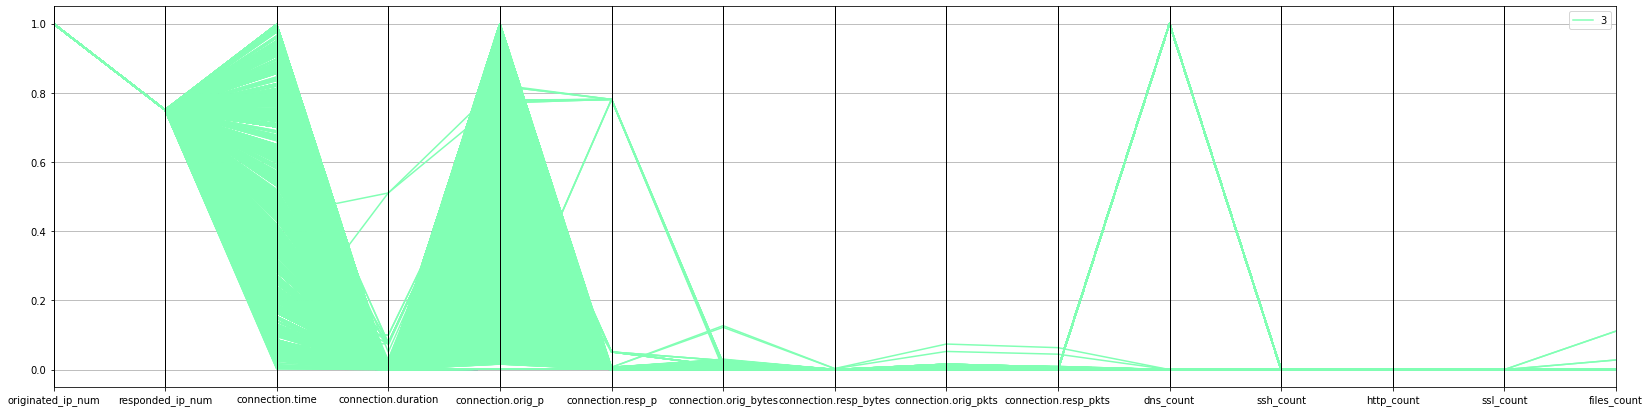

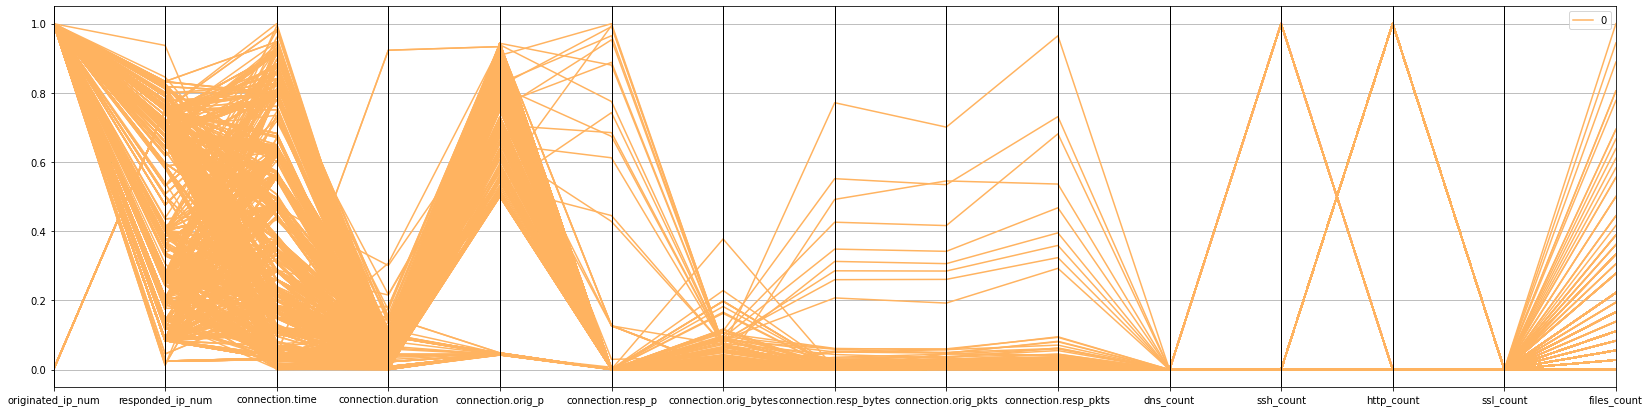

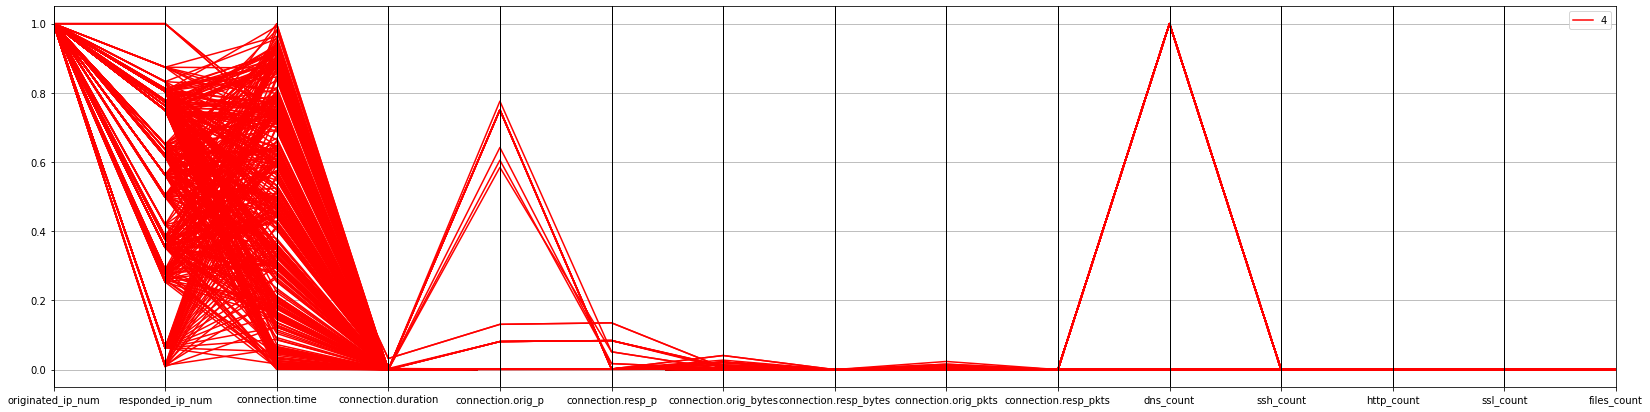

In [92]:
import pandas as pd

clusters = pca_X['cluster'].unique()

for i in range(len(clusters)):
    plt.rcParams["figure.figsize"] = (28,7)
    pd.plotting.parallel_coordinates(coord_vis_df.loc[coord_vis_df['cluster'] == clusters[i]], 'cluster', color=colors[i])
    plt.show()

With dominant neighbourhood:

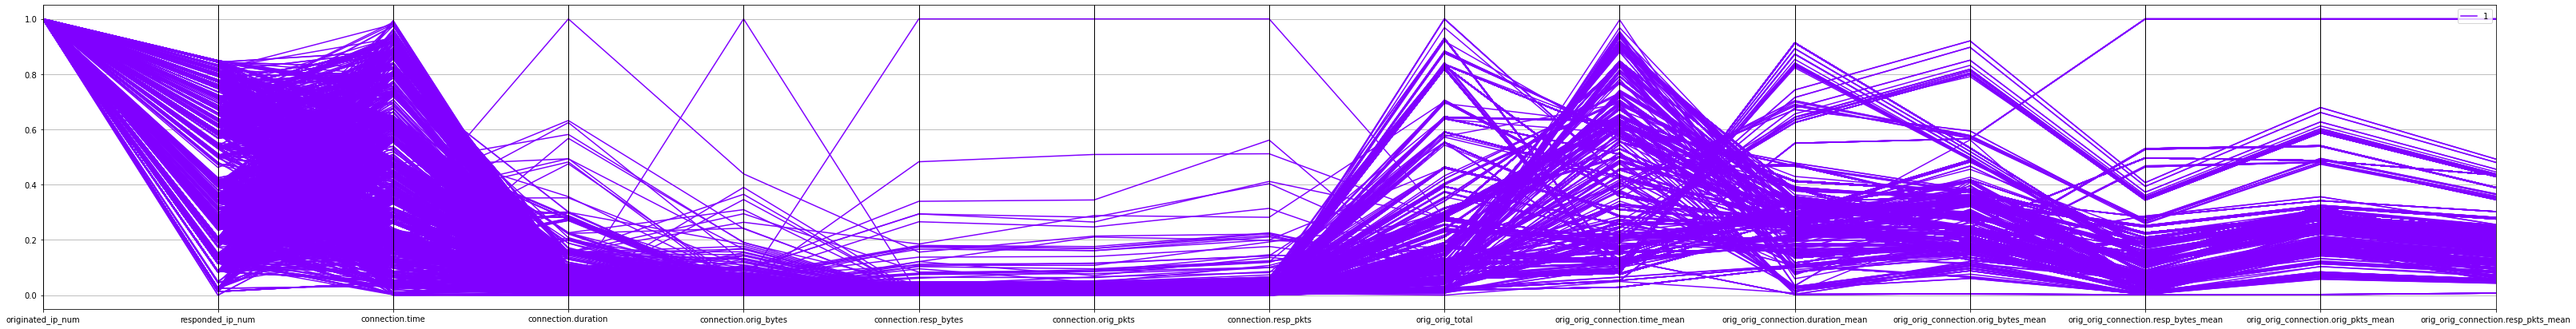

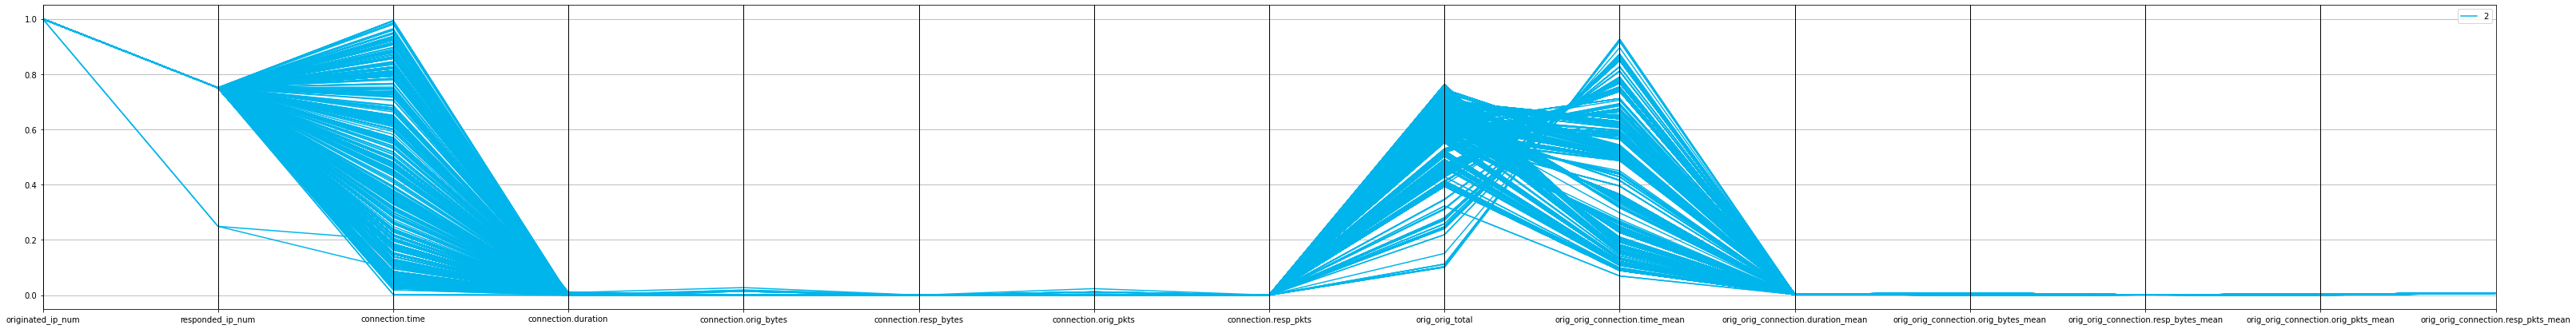

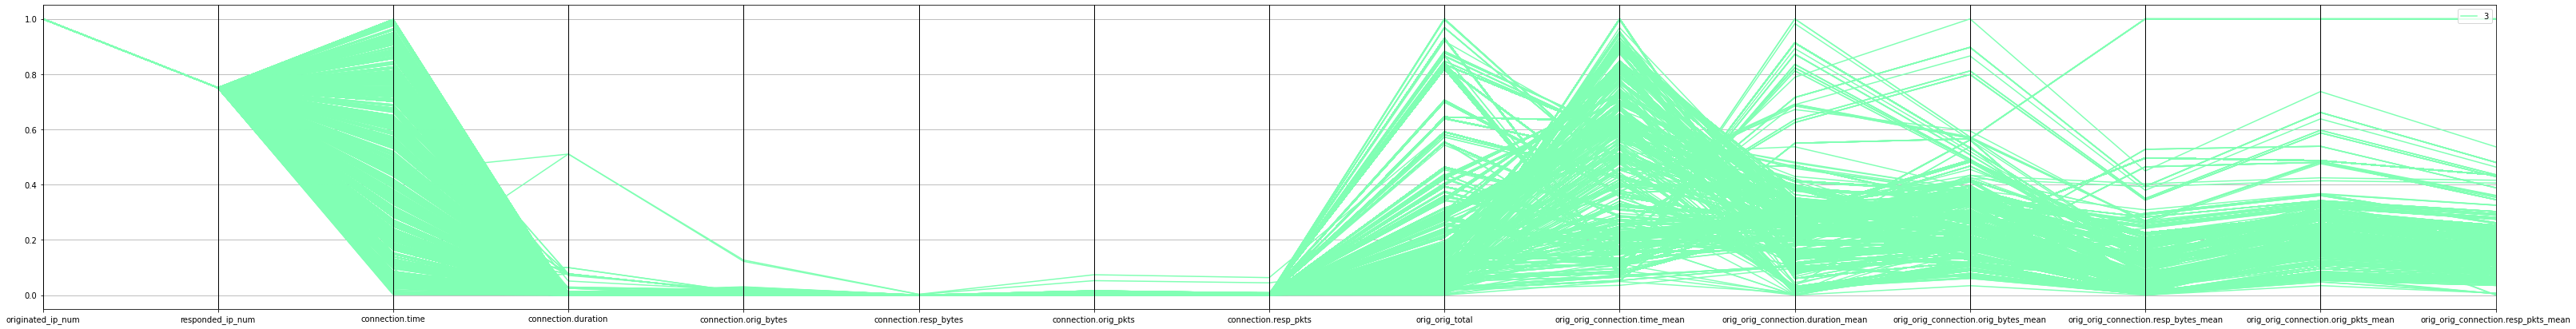

In [93]:
INTERPRETATION_COLS = ['uid', 
                       'originated_ip_num', 'originated_ip', 
                       'responded_ip_num', 'responded_ip', 
                       'timestamp', 'connection.time', 
                       'duration', 'connection.duration',
                       'protocol', 'service', 'conn_state',
                       'connection.orig_p', 'o_port', 'orig_p_cat', 'connection.orig_bytes', 'o_bytes', 'connection.orig_pkts', 'connection.orig_pkts.1', #'o_ip_bytes', 
                       'connection.resp_p', 'r_port', 'resp_p_cat', 'connection.resp_bytes', 'r_bytes', 'connection.resp_pkts', 'connection.resp_pkts.1', #'r_ip_bytes',
                       'dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count', 
                       'orig_orig_total', 
                            'orig_orig_connection.time_mean', 
                            'orig_orig_connection.duration_mean',
                            'orig_orig_connection.orig_pkts_mean',
                            'orig_orig_connection.orig_bytes_mean',
                            'orig_orig_connection.resp_bytes_mean',
                            'orig_orig_connection.resp_pkts_mean',
                       'attacker_label', 'victim_label']

labels_df = selected_df[INTERPRETATION_COLS]

result = pd.concat([pca_X, labels_df], axis=1)

features_df = labels_df[['originated_ip_num', 
                     'responded_ip_num', 
                     'connection.time', 
                     'connection.duration', 
                     #'connection.orig_p', 'connection.resp_p', 
                     'connection.orig_bytes', 'connection.resp_bytes', 
                     'connection.orig_pkts', 'connection.resp_pkts', 
                        'orig_orig_total', 
                            'orig_orig_connection.time_mean', 
                            'orig_orig_connection.duration_mean',
                            'orig_orig_connection.orig_bytes_mean',
                            'orig_orig_connection.resp_bytes_mean',
                            'orig_orig_connection.orig_pkts_mean',
                            'orig_orig_connection.resp_pkts_mean']]

coord_vis_df = pd.concat([features_df, pca_X['cluster']], axis=1)
coord_vis_df = coord_vis_df #.sample(100)

clusters = pca_X['cluster'].unique()

for i in range(len(clusters)):
    plt.rcParams["figure.figsize"] = (55,7)
    pd.plotting.parallel_coordinates(coord_vis_df.loc[coord_vis_df['cluster'] == clusters[i]], 'cluster', color=colors[i])
    plt.show()